# Subclustering of Posterior endoderm/Hindgut/Ecto. PS14 in Set 3

In [1]:
# loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = "../../data/seurat_object/Set3/seu_HQC_Set3.obj")

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


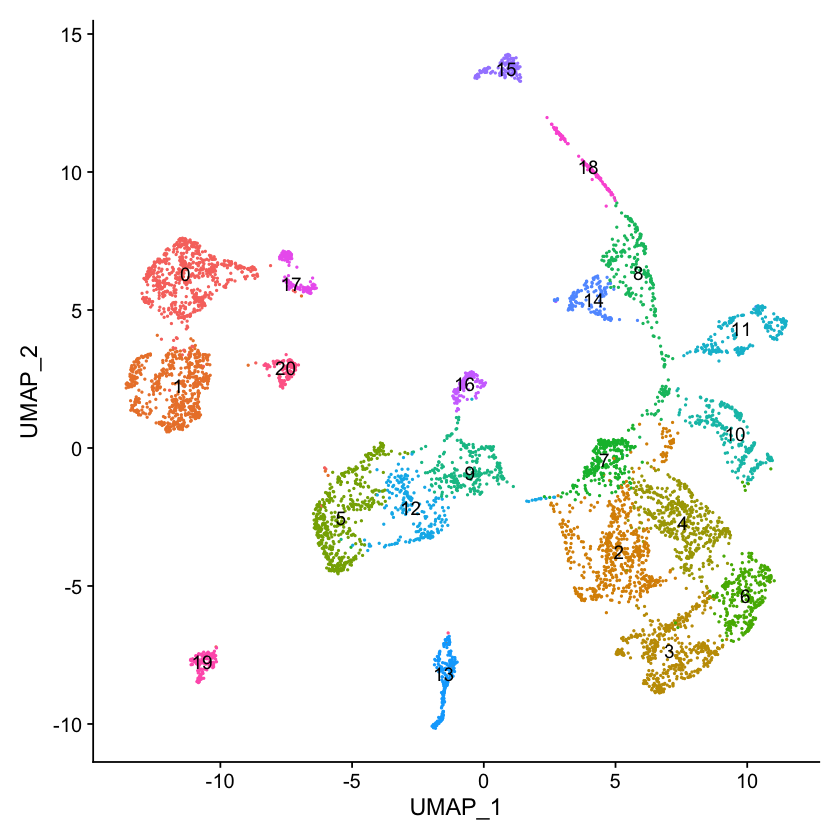

In [3]:
DimPlot(seu_HQC, reduction =  "umap", label = TRUE) + NoLegend()

## Picking up target subclusters

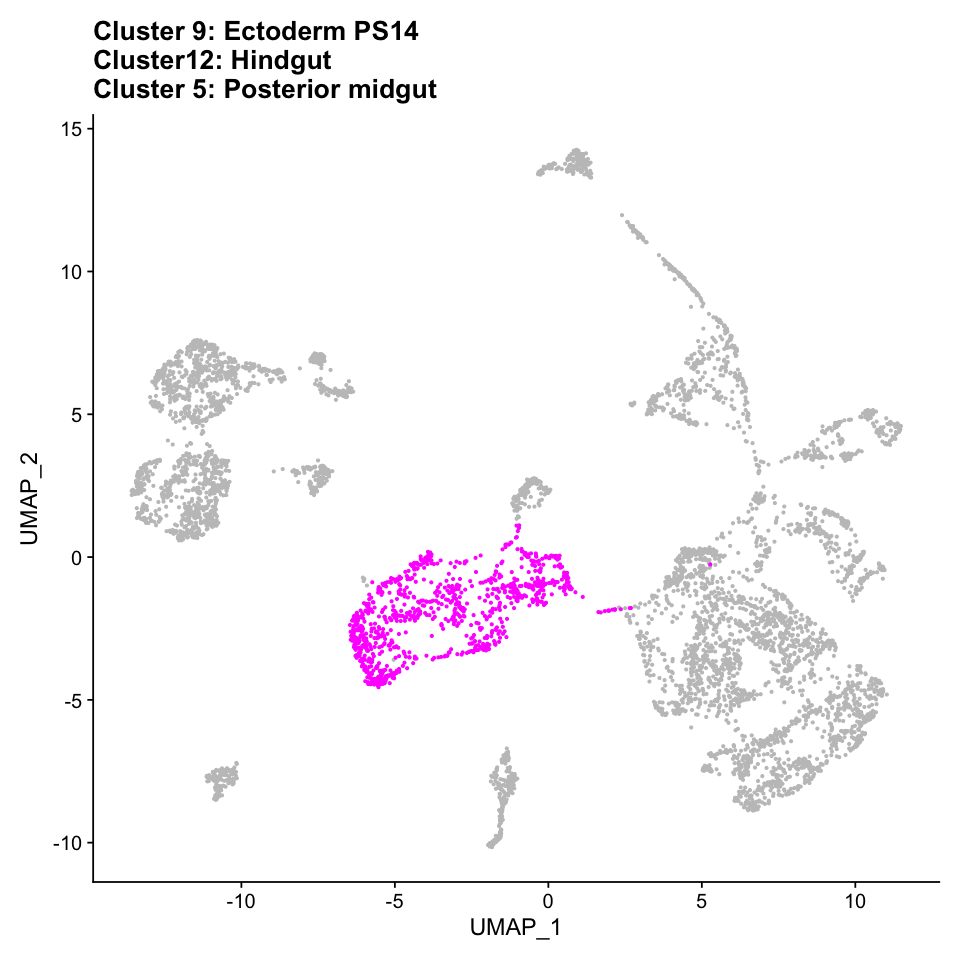

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(5, 9, 12))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle(
    'Cluster 9: Ectoderm PS14\nCluster12: Hindgut\nCluster 5: Posterior midgut')

In [5]:
seu_HQC_postend <- subset(seu_HQC, ident = c("5","9","12"))
seu_HQC_postend

An object of class Seurat 
28756 features across 933 samples within 2 assays 
Active assay: SCT (11250 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
seu_HQC_postend$allcell_clusters <- Idents(object = seu_HQC_postend)

## Re-normalize and clustering

In [7]:
DefaultAssay(seu_HQC_postend) <- "RNA"
seu_HQC_postend

An object of class Seurat 
28756 features across 933 samples within 2 assays 
Active assay: RNA (17506 features, 0 variable features)
 1 other assay present: SCT
 2 dimensional reductions calculated: pca, umap

In [8]:
seu_HQC_postend <- suppressWarnings(SCTransform(seu_HQC_postend, vars.to.regress = c("percent.mt", "percent.rRNA"), verbose = FALSE))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


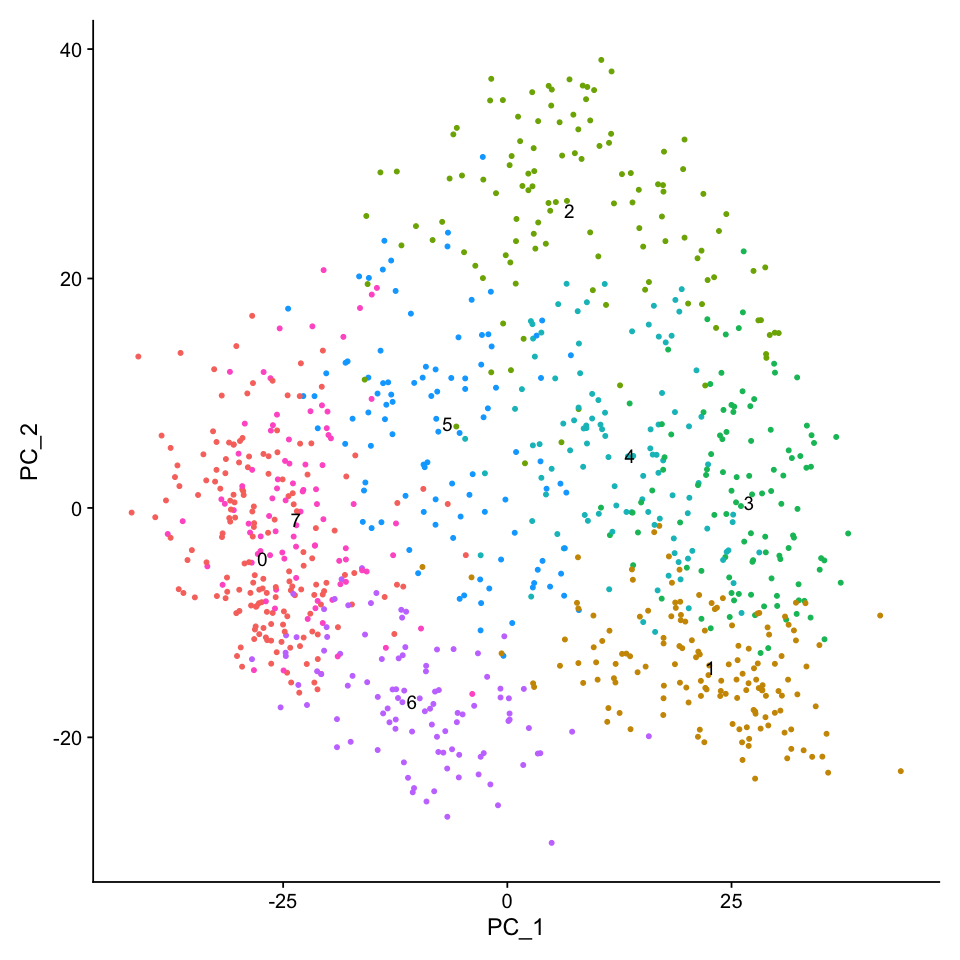

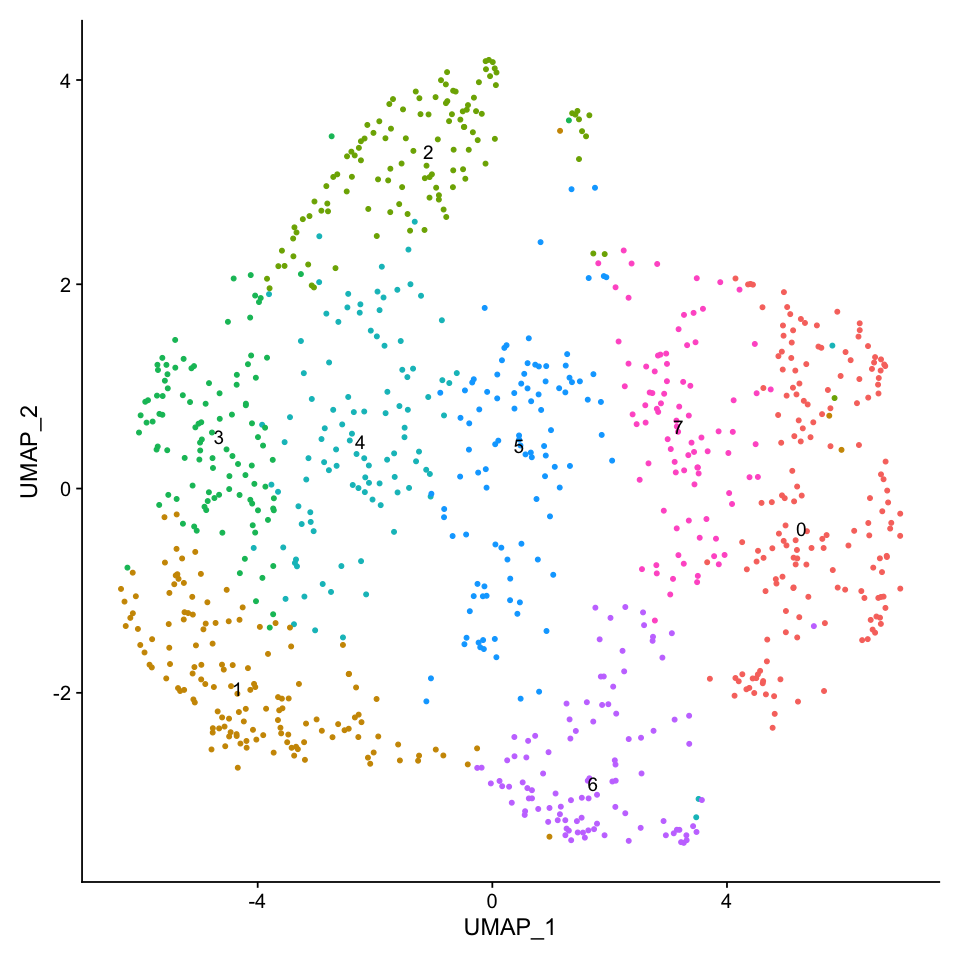

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_postend <- RunPCA(seu_HQC_postend, verbose = FALSE)
seu_HQC_postend <- RunUMAP(seu_HQC_postend, dims = 1:30, verbose = FALSE, n.neighbors = 20L)
seu_HQC_postend <- FindNeighbors(seu_HQC_postend, dims = 1:30, verbose = FALSE)
seu_HQC_postend <- FindClusters(seu_HQC_postend, verbose = FALSE)
DimPlot(seu_HQC_postend, reduction =  "pca", label = TRUE) + NoLegend()
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE) + NoLegend()

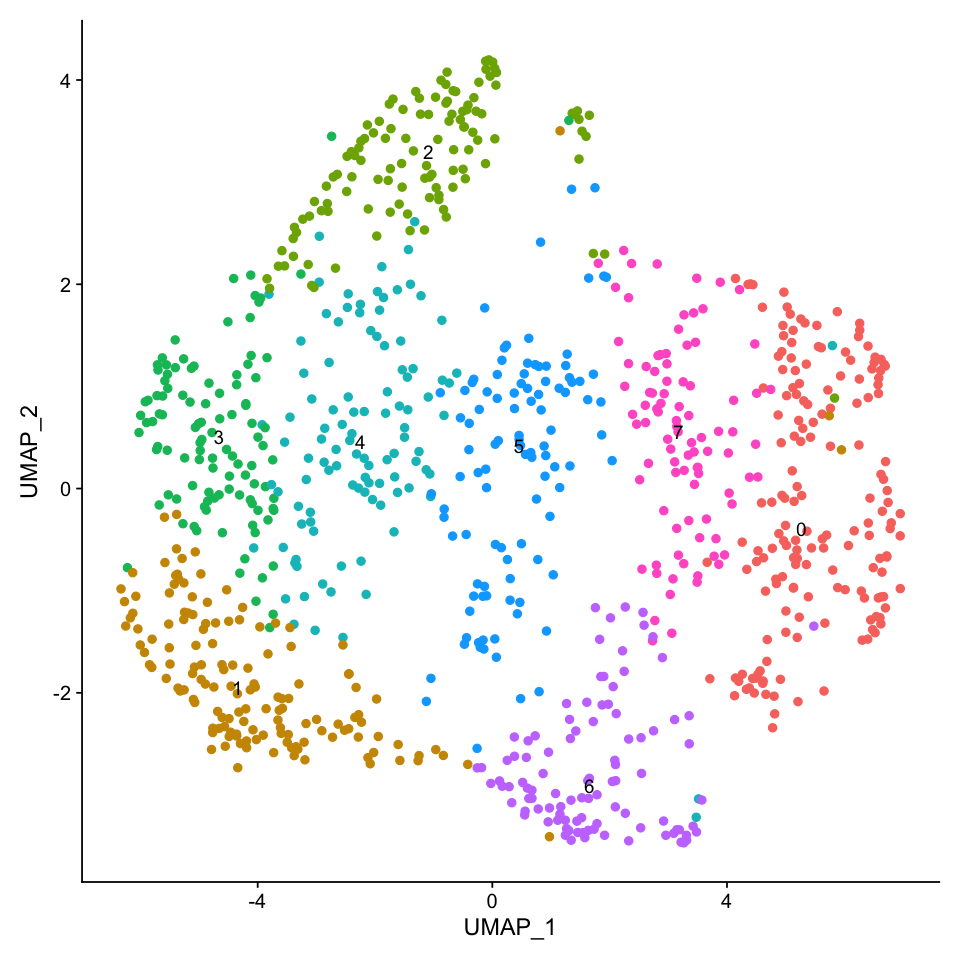

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_postend <- FindClusters(seu_HQC_postend, verbose = FALSE, resolution=1)
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE, pt.size=2) + NoLegend()

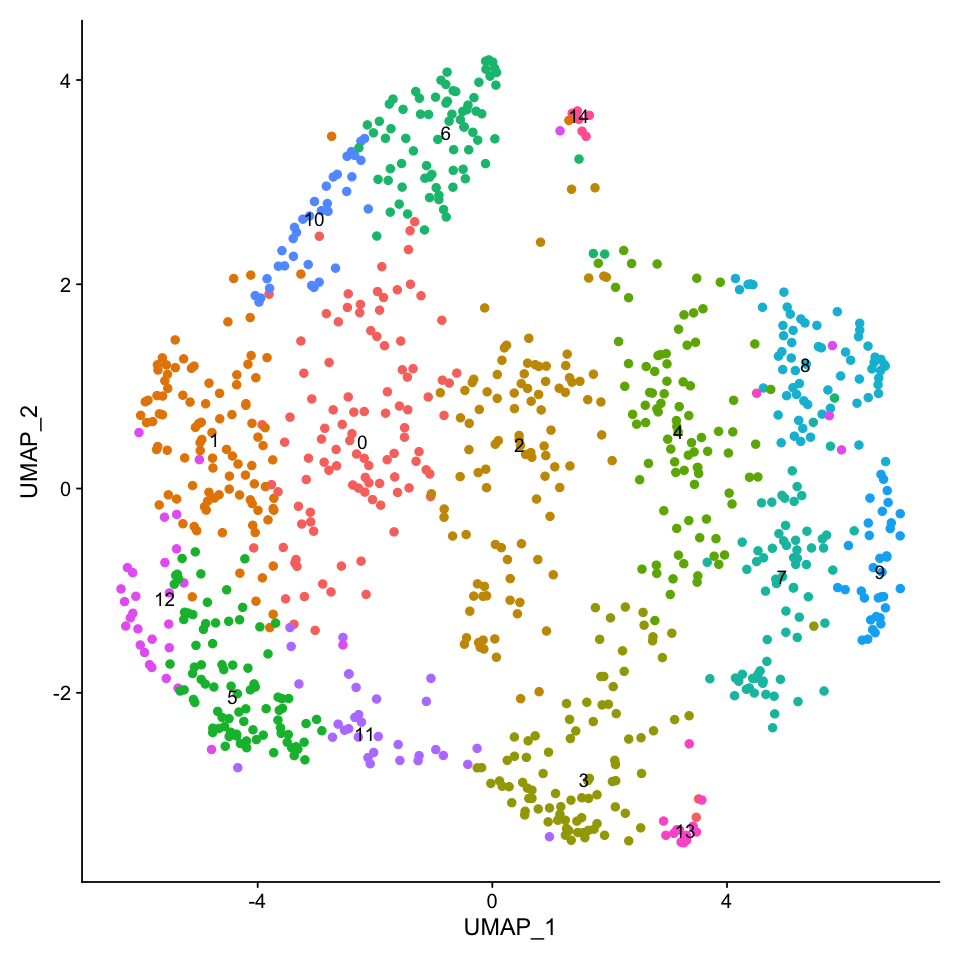

In [11]:
seu_HQC_postend <- FindClusters(seu_HQC_postend, verbose = FALSE, resolution=2.1)
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE, pt.size=2) + NoLegend()

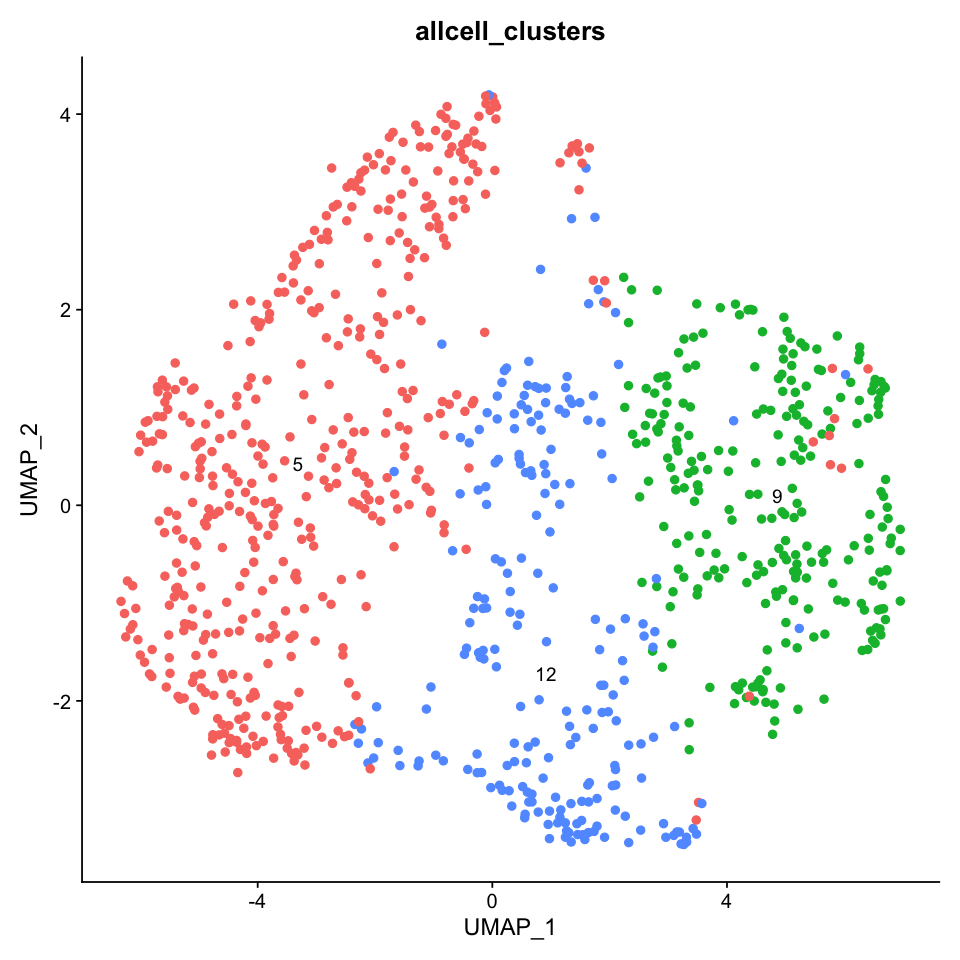

In [12]:
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE, group.by = "allcell_clusters", pt.size=2) + NoLegend()


In [13]:
levels <- c(9,7,8,4,13,3,2,11,5,12,0,1,6,10,14)
levels(seu_HQC_postend) <- levels

In [14]:
all.markers.post <- FindAllMarkers(object = seu_HQC_postend, only.pos = TRUE)


Calculating cluster 9

Calculating cluster 7

Calculating cluster 8

Calculating cluster 4

Calculating cluster 13

Calculating cluster 3

Calculating cluster 2

Calculating cluster 11

Calculating cluster 5

Calculating cluster 12

Calculating cluster 0

Calculating cluster 1

Calculating cluster 6

Calculating cluster 10

Calculating cluster 14



In [15]:
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

[1] 2577

[1] 150

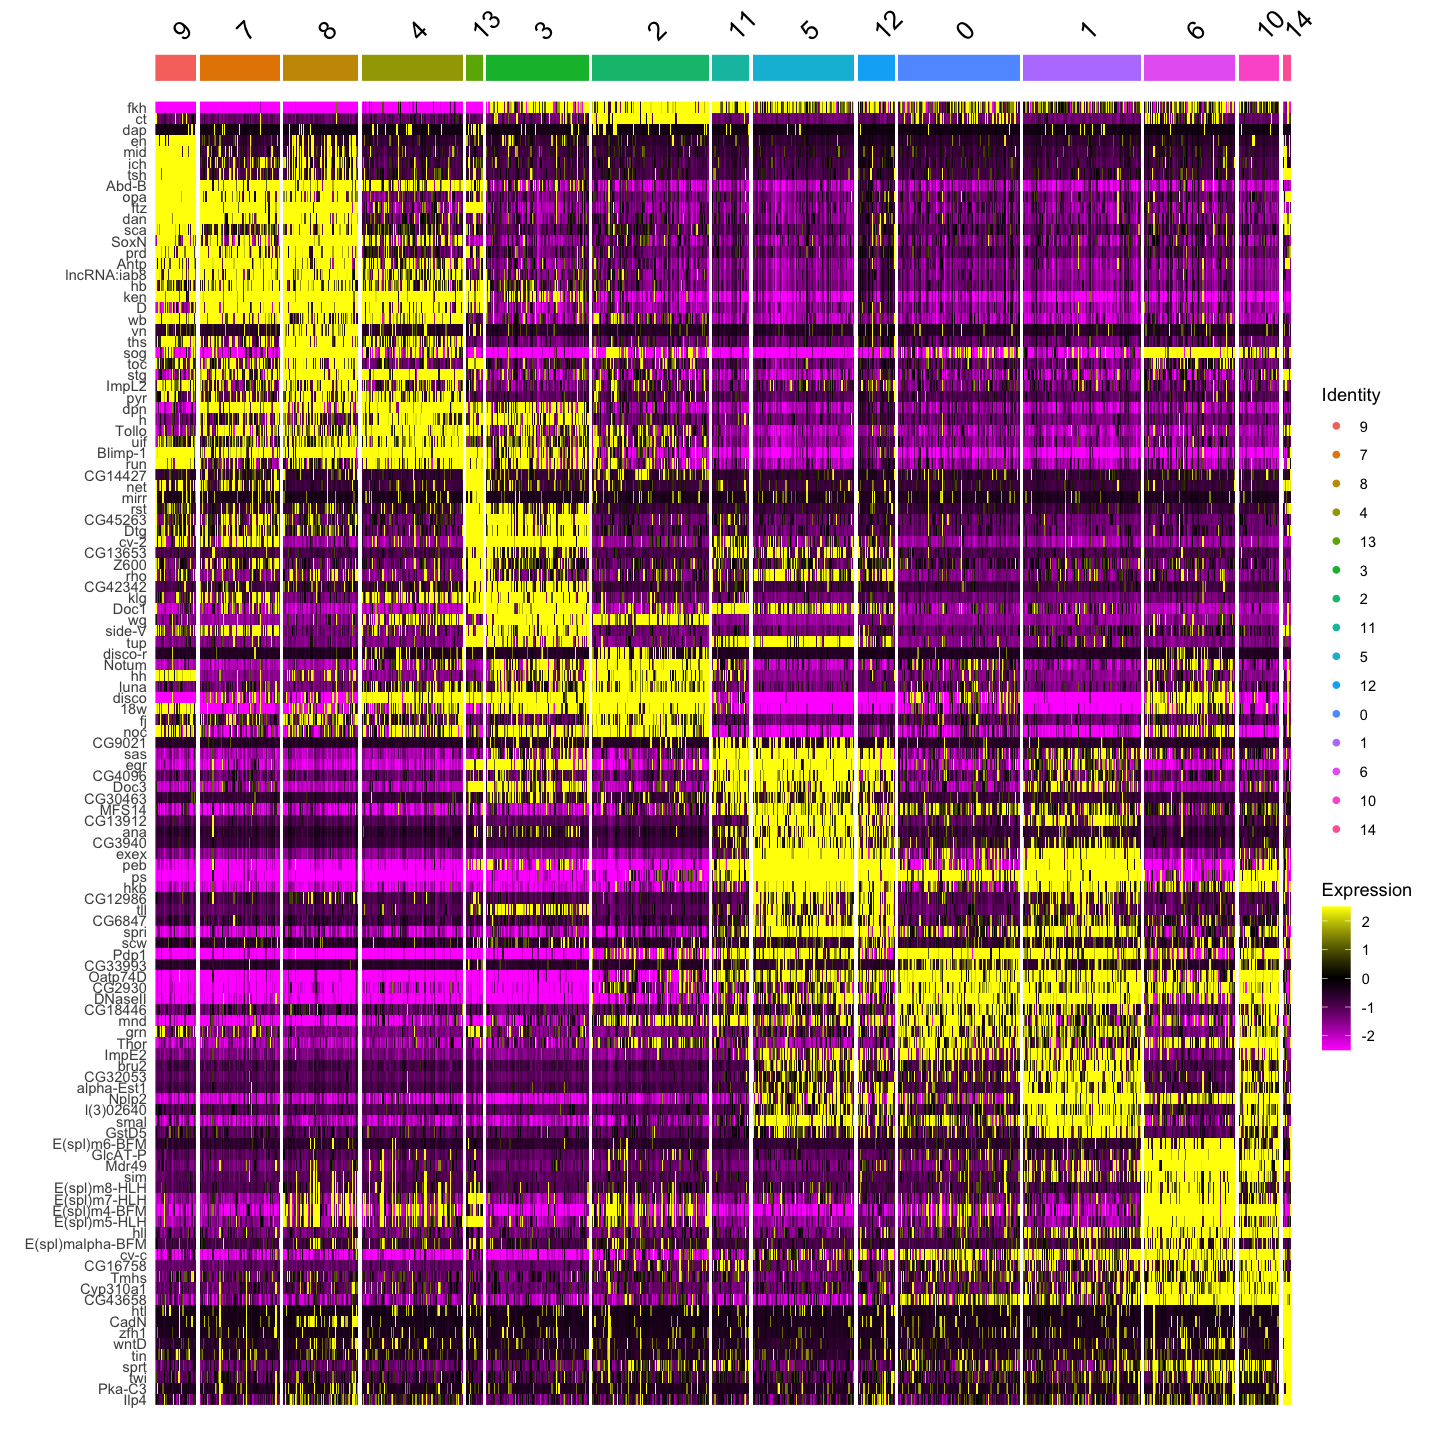

In [16]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu_HQC_postend, features = c("fkh","ct", "dap", all.markers.post.top10$gene))

Cluster 14 expressed mesoderm markers. (doublets)

## removing doublet

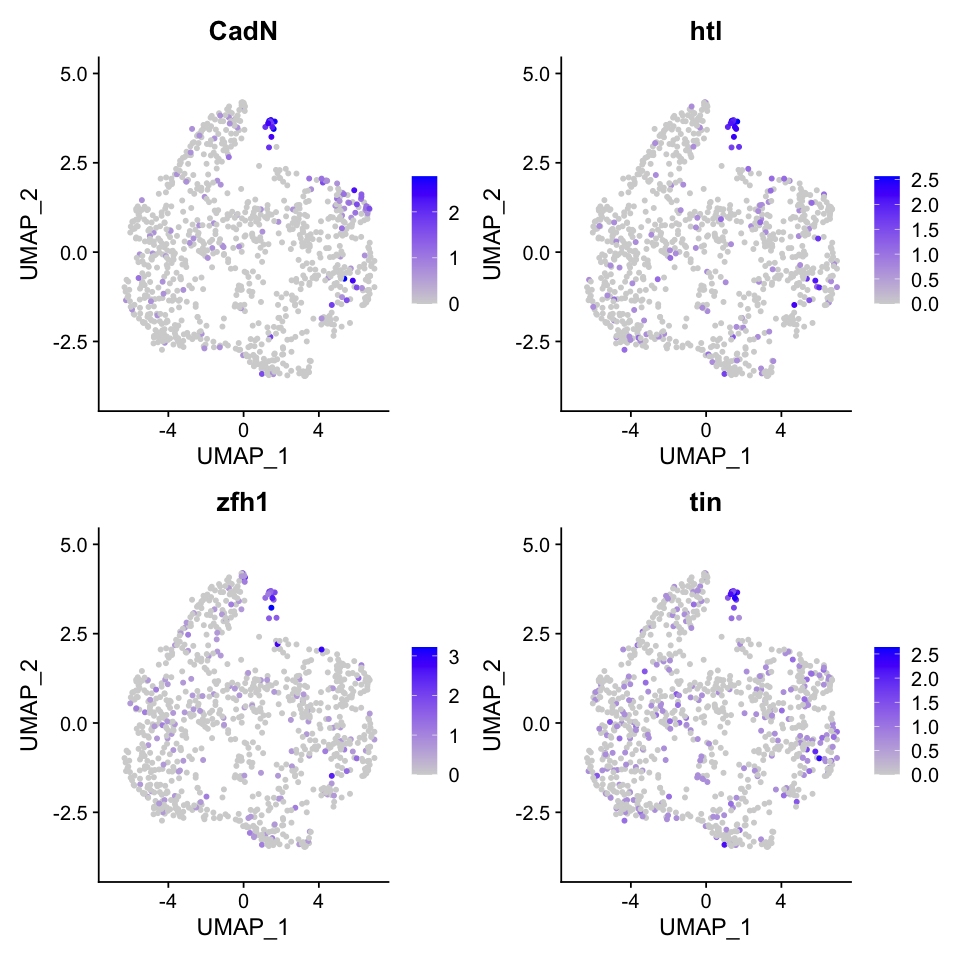

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_postend, reduction = "umap", features = c("CadN", "htl", "zfh1", "tin"), pt.size = 1,  ncol = 2)

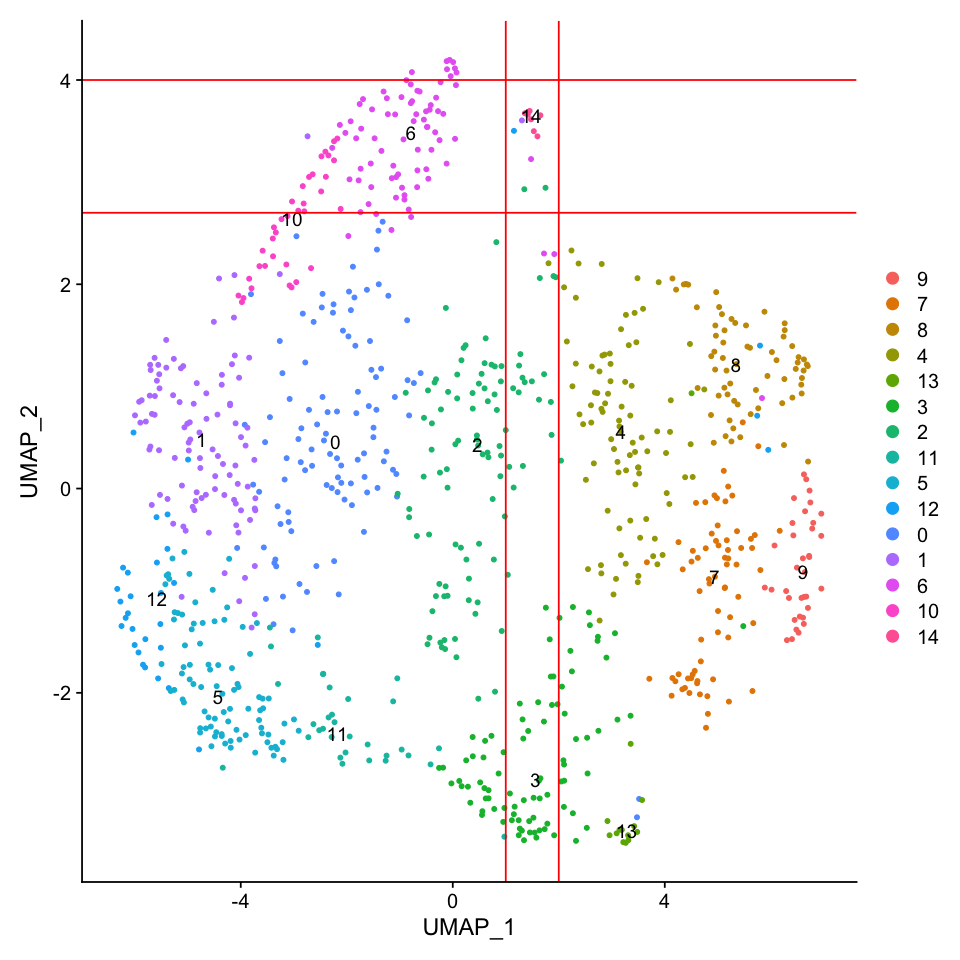

In [18]:
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE) + 
geom_vline(xintercept=1, colour="red") + 
geom_vline(xintercept=2, colour="red") + 
geom_hline(yintercept=2.7, colour="red") + 
geom_hline(yintercept=4, colour="red")

In [19]:
seu_HQC_postend_umap <- Embeddings(seu_HQC_postend, reduction = "umap")
seu_HQC_postend_umap <- as.data.frame(seu_HQC_postend_umap)
seu_HQC_postend_umap <- seu_HQC_postend_umap %>% rownames_to_column("cellID")
head(seu_HQC_postend_umap)

cellID           UMAP_1     UMAP_2    
1 AAACCCAAGCGATCGA -1.9483244  3.0272924
2 AAACGAAAGGAACGAA -0.3988323  0.3810040
3 AAACGAACACTAGTAC -3.3303030 -0.7615283
4 AAACGCTAGCGAACTG  6.3043875 -1.4842675
5 AAACGCTTCCGTTGAA  3.2634348 -0.7357975
6 AAAGAACAGACATAGT  4.9666423 -0.5124701

In [20]:
seu_HQC_postend_umap_doublet <- filter(seu_HQC_postend_umap, UMAP_1 >1 & UMAP_1 < 2 & UMAP_2 > 2.7 & UMAP_2 < 4)

In [21]:
dim(seu_HQC_postend_umap_doublet)
doublet_list <- seu_HQC_postend_umap_doublet$cellID
doublet_list

[1] 12  3

[1] "ACACTGAGTGCACGCT" "ACCACAATCATCCCGT" "ACGTCCTTCGAGTTGT" "AGATGCTTCGCCTCTA"
 [5] "CGAGAAGTCCGAAATC" "CGTAATGCAAAGCGTG" "CTCCAACGTAGACTGG" "GATTTCTGTTACGCCG"
 [9] "GTCTGTCAGTCGGGAT" "TACAGGTAGATCCAAA" "TCATTTGGTAGGCAAC" "TCGACGGTCTGCCTCA"

In [22]:
ID <- rep("doublet", length=length(doublet_list)) 
ID

[1] "doublet" "doublet" "doublet" "doublet" "doublet" "doublet" "doublet"
 [8] "doublet" "doublet" "doublet" "doublet" "doublet"

In [23]:
doublet_ID <- data.frame(doublet_list, ID)
doublet_ID <- doublet_ID %>% column_to_rownames("doublet_list")
head(doublet_ID)

ID     
ACACTGAGTGCACGCT doublet
ACCACAATCATCCCGT doublet
ACGTCCTTCGAGTTGT doublet
AGATGCTTCGCCTCTA doublet
CGAGAAGTCCGAAATC doublet
CGTAATGCAAAGCGTG doublet

In [24]:
write.table(doublet_ID, file="./manual_ID_list/seu_HQC_postend_doublet_manualID.txt",sep="\t",col.names=T,row.names=T,quote=F)

In [25]:
seu_HQC_postend_umap_singlet <- filter(seu_HQC_postend_umap, !cellID %in% doublet_list)
singlet_list <- seu_HQC_postend_umap_singlet$cellID
length(singlet_list)

[1] 921

In [26]:
seu_HQC_postend_temp <- seu_HQC_postend

In [27]:
seu_HQC_postend <- seu_HQC_postend_temp[, singlet_list]
seu_HQC_postend

An object of class Seurat 
26560 features across 921 samples within 2 assays 
Active assay: SCT (9054 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## Clustering again

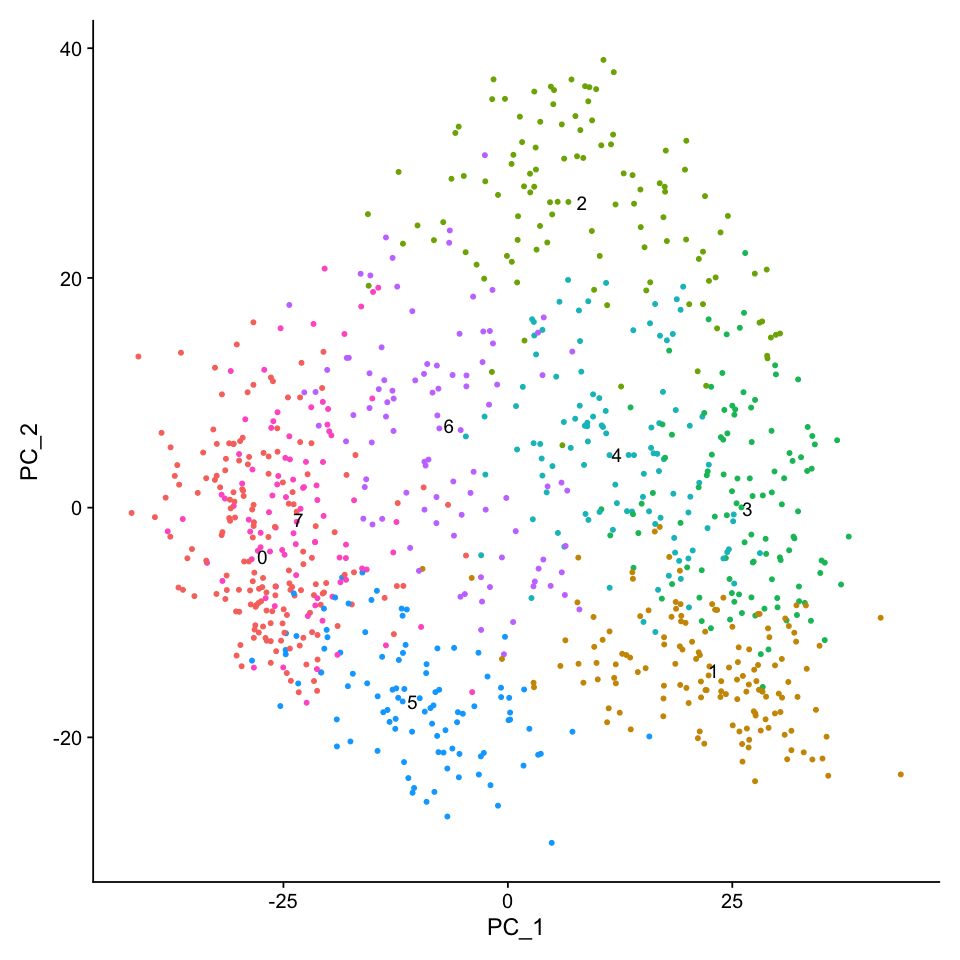

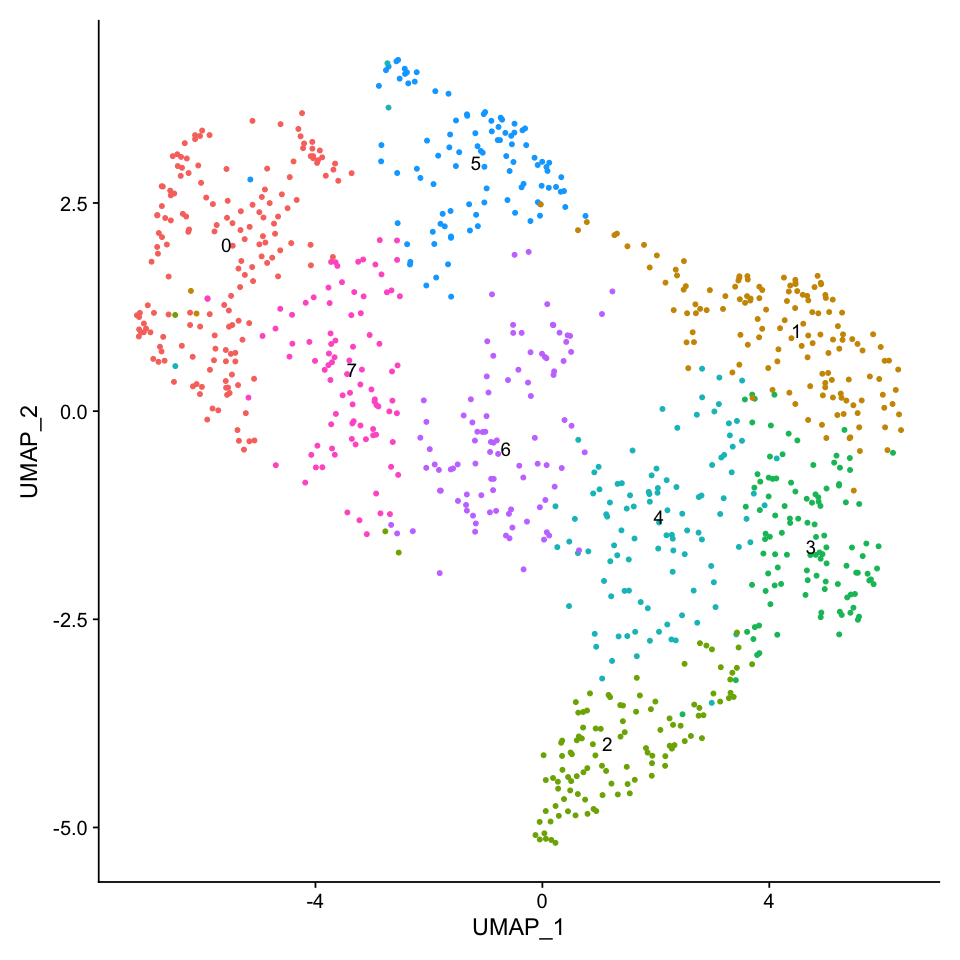

In [28]:
# clustering again
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_postend <- RunPCA(seu_HQC_postend, verbose = FALSE)
seu_HQC_postend <- RunUMAP(seu_HQC_postend, dims = 1:30, verbose = FALSE, n.neighbors = 20L)
seu_HQC_postend <- FindNeighbors(seu_HQC_postend, dims = 1:30, verbose = FALSE)
seu_HQC_postend <- FindClusters(seu_HQC_postend, verbose = FALSE)
DimPlot(seu_HQC_postend, reduction =  "pca", label = TRUE) + NoLegend()
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE) + NoLegend()

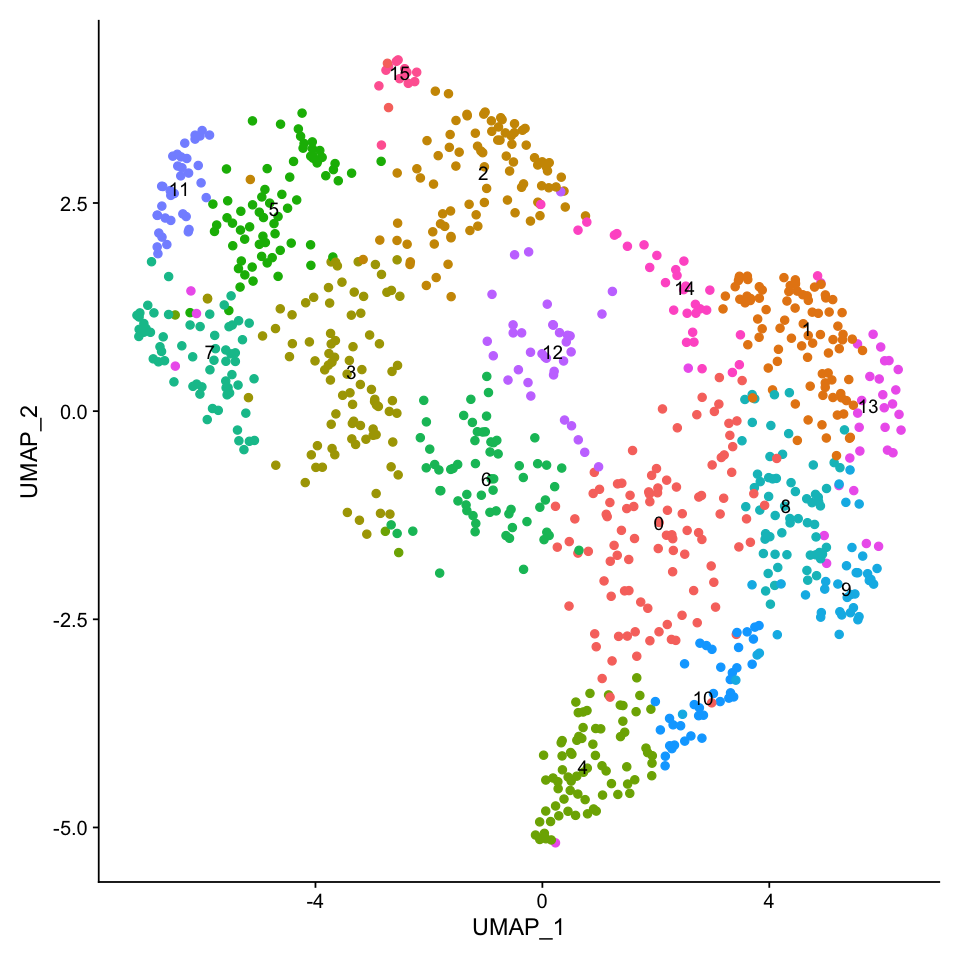

In [29]:
seu_HQC_postend <- FindClusters(seu_HQC_postend, verbose = FALSE, resolution=2.3)
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE, pt.size=2) + NoLegend()

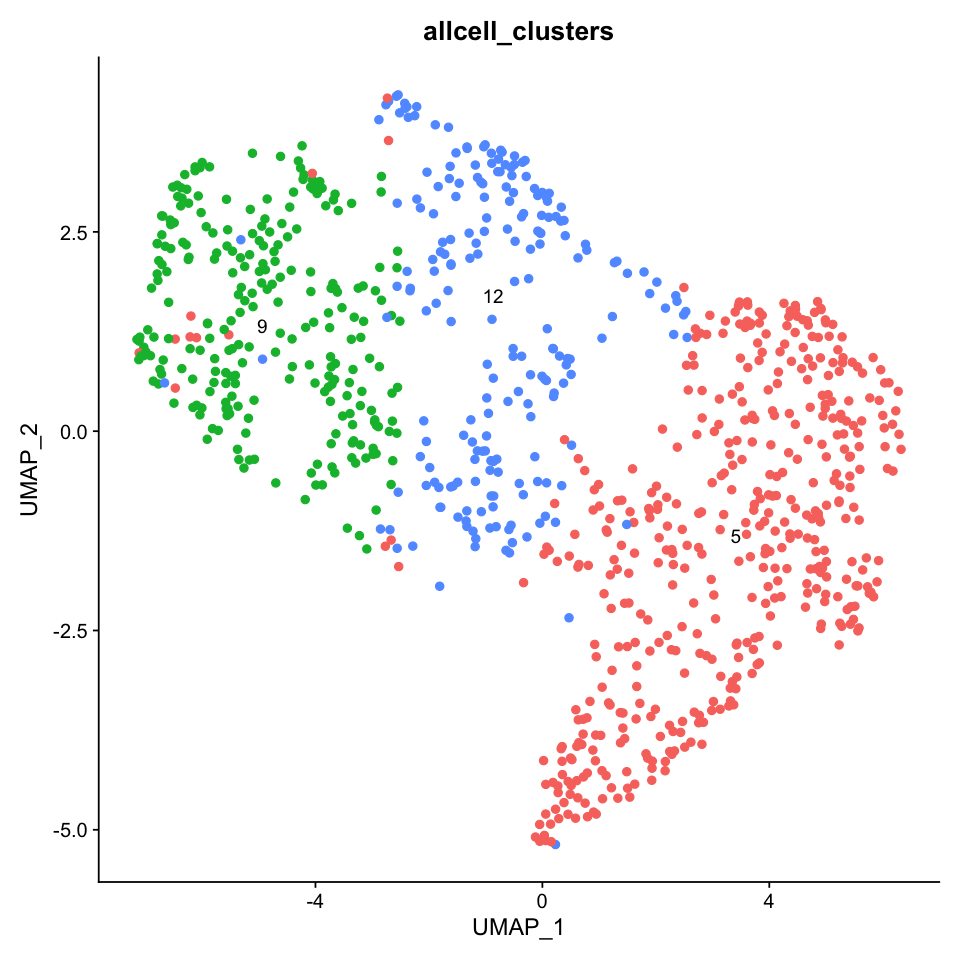

In [30]:
DimPlot(seu_HQC_postend, reduction =  "umap", label = TRUE, group.by = "allcell_clusters", pt.size=2) + NoLegend()

In [31]:
levels <- c(11,5,7,15,3,2,12,6,14,1,13,0,8,9,10,4)
levels(seu_HQC_postend) <- levels

In [32]:
all.markers.post <- FindAllMarkers(object = seu_HQC_postend, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster 11

Calculating cluster 5

Calculating cluster 7

Calculating cluster 15

Calculating cluster 3

Calculating cluster 2

Calculating cluster 12

Calculating cluster 6

Calculating cluster 14

Calculating cluster 1

Calculating cluster 13

Calculating cluster 0

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 4



[1] 2554

[1] 160

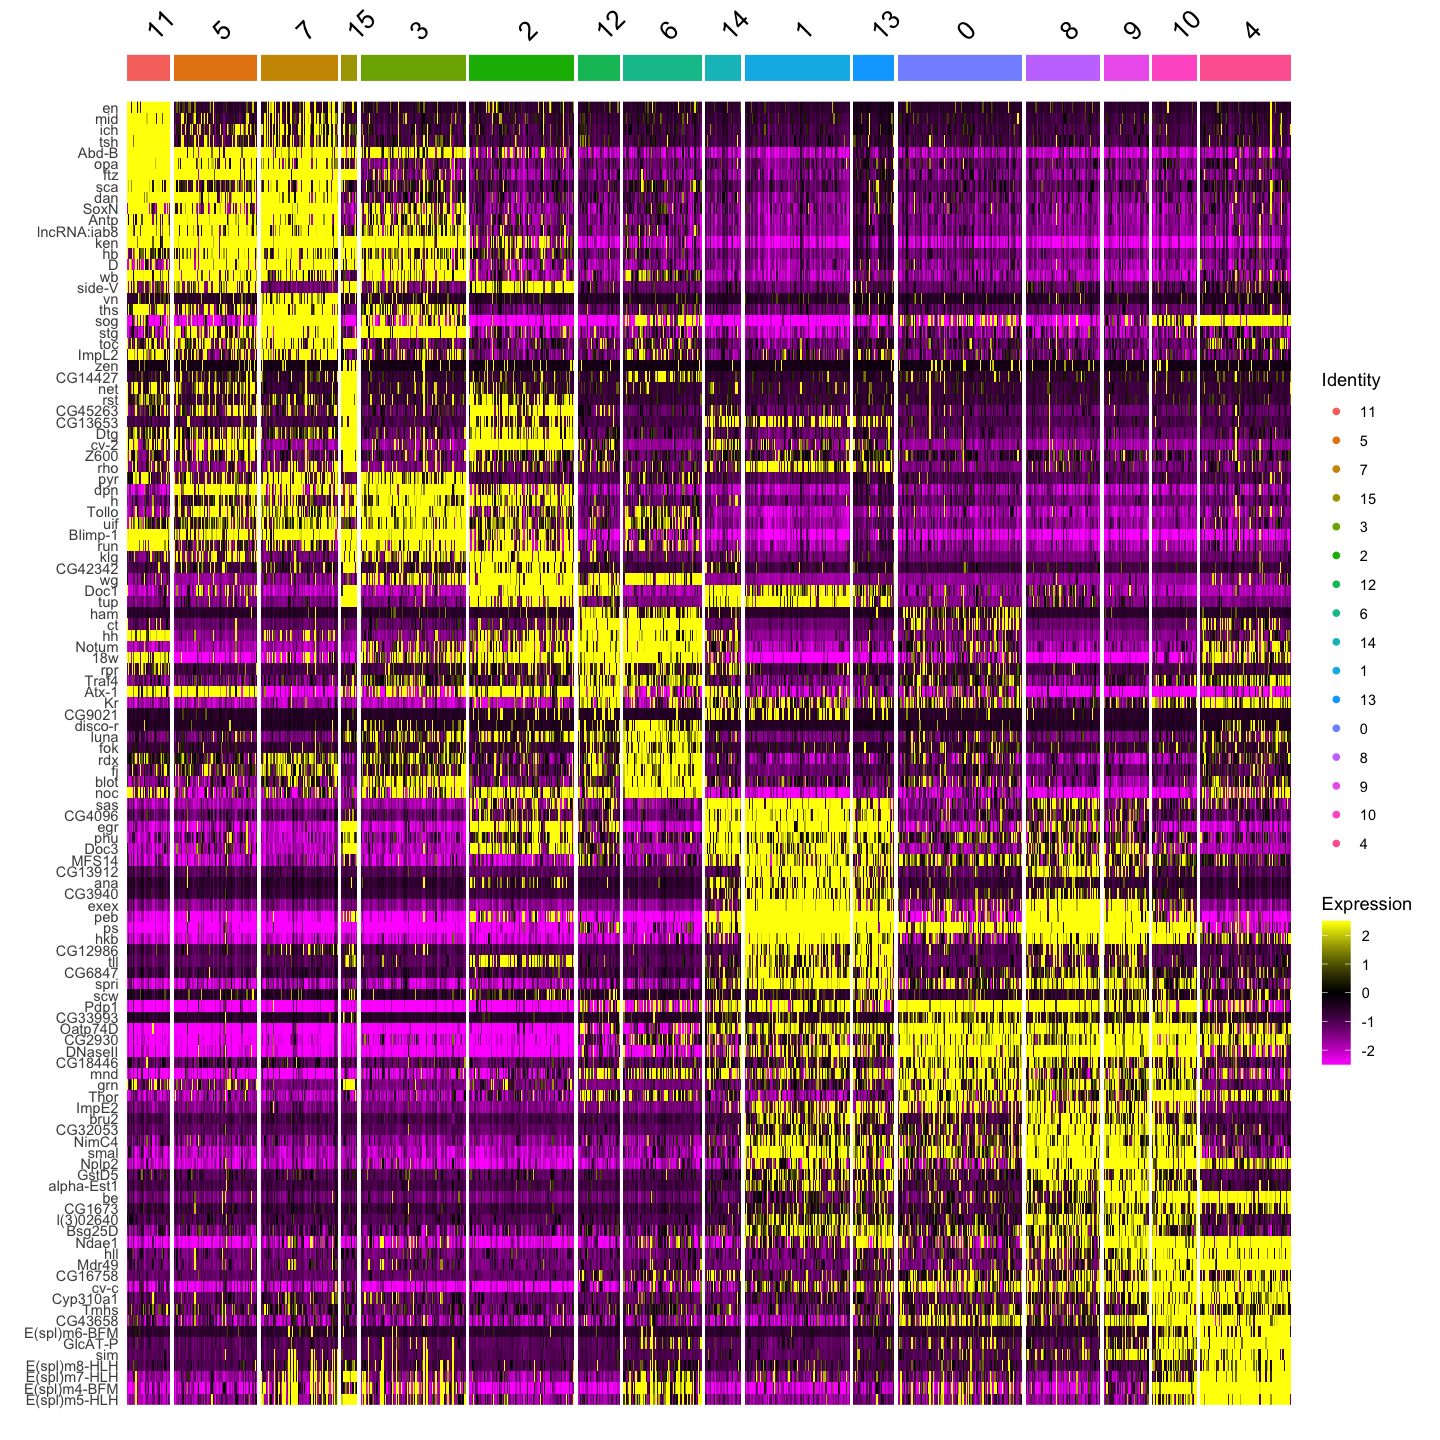

In [33]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu_HQC_postend, features = c(all.markers.post.top10$gene))

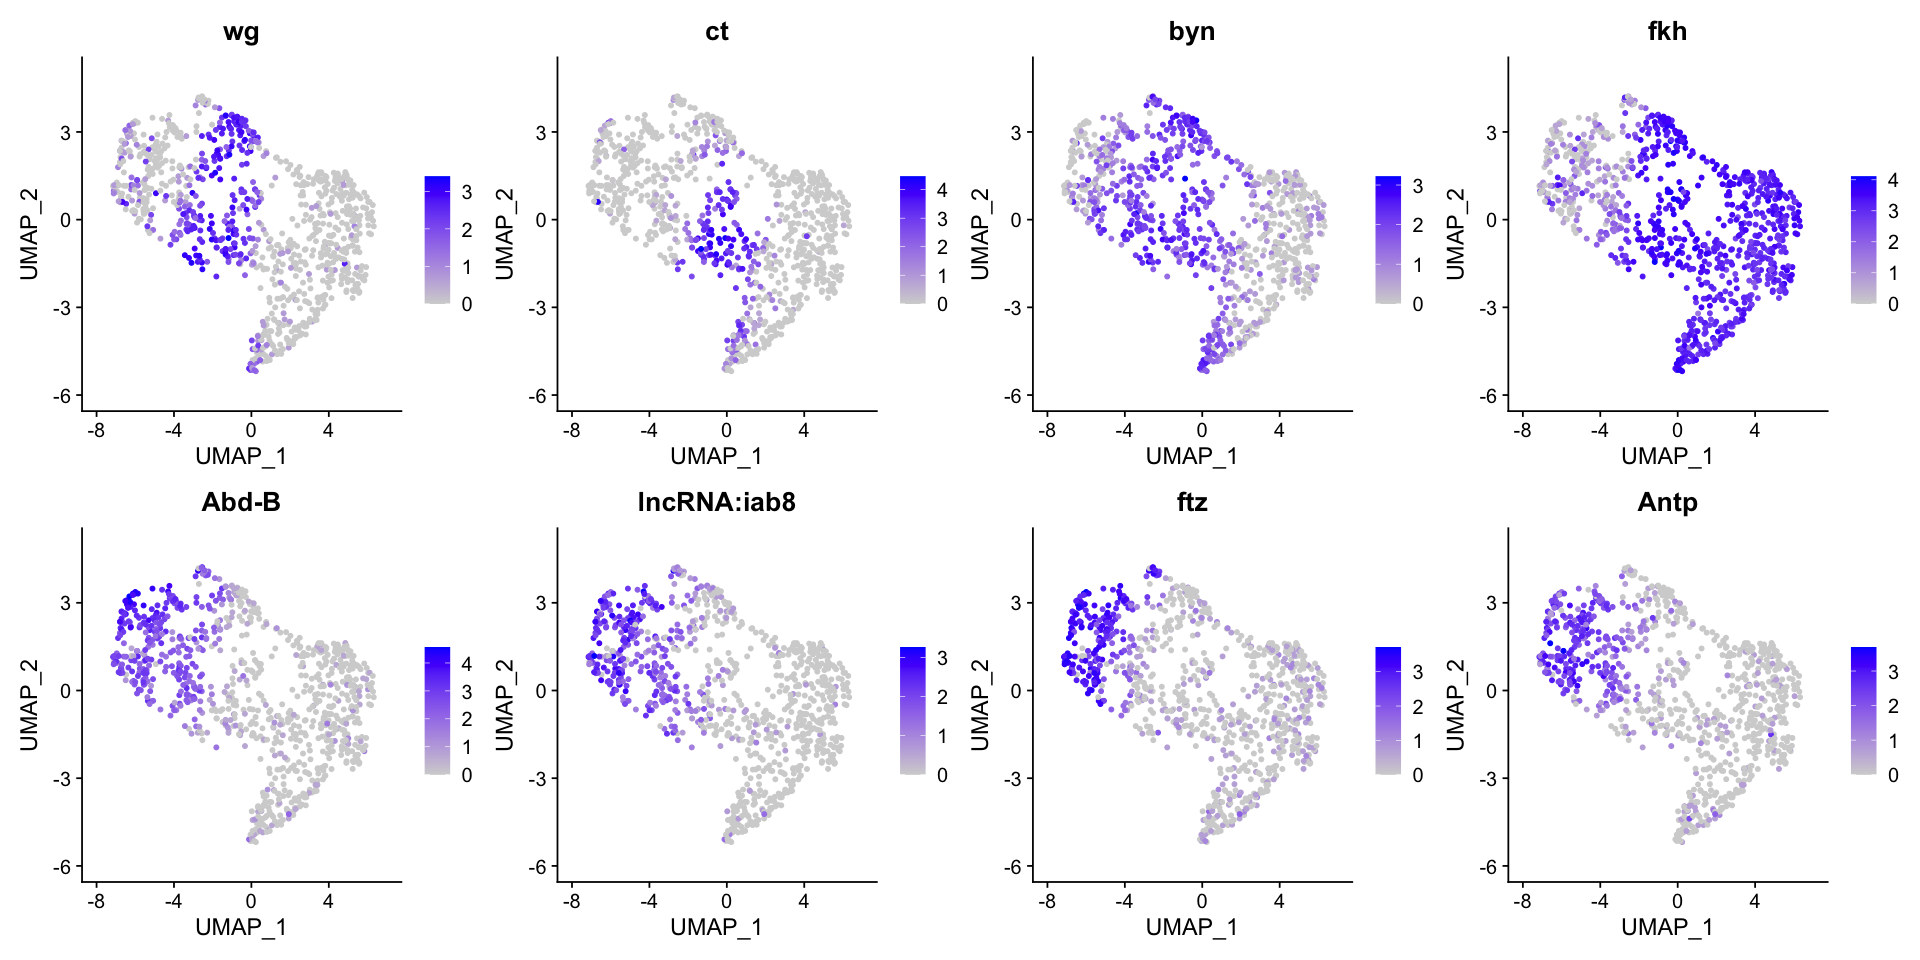

In [34]:
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(seu_HQC_postend, reduction = "umap",
            features = c("wg", "ct", "byn","fkh", 
                        "Abd-B","lncRNA:iab8","ftz","Antp"),
            pt.size = 1,  ncol = 4)

In [35]:
path = './figures/06_subclustering_postend_manualID'
for (name in c("Abd-B","byn","fkh","wg","ct","ftz","run","ct")){
    options(repr.plot.width=8, repr.plot.height=8)
    p <- FeaturePlot(seu_HQC_postend, features = name)
    basename = paste(name, 'Set3_post.eps', sep='_')
    filename = paste(path, basename, sep = '/')
    ggsave(p, file = filename, width = 8, height = 8)
}

Hindgut maker genes (Top) and Ectoderm PS14 markers(Bottom) were co-expressed in cluster 3

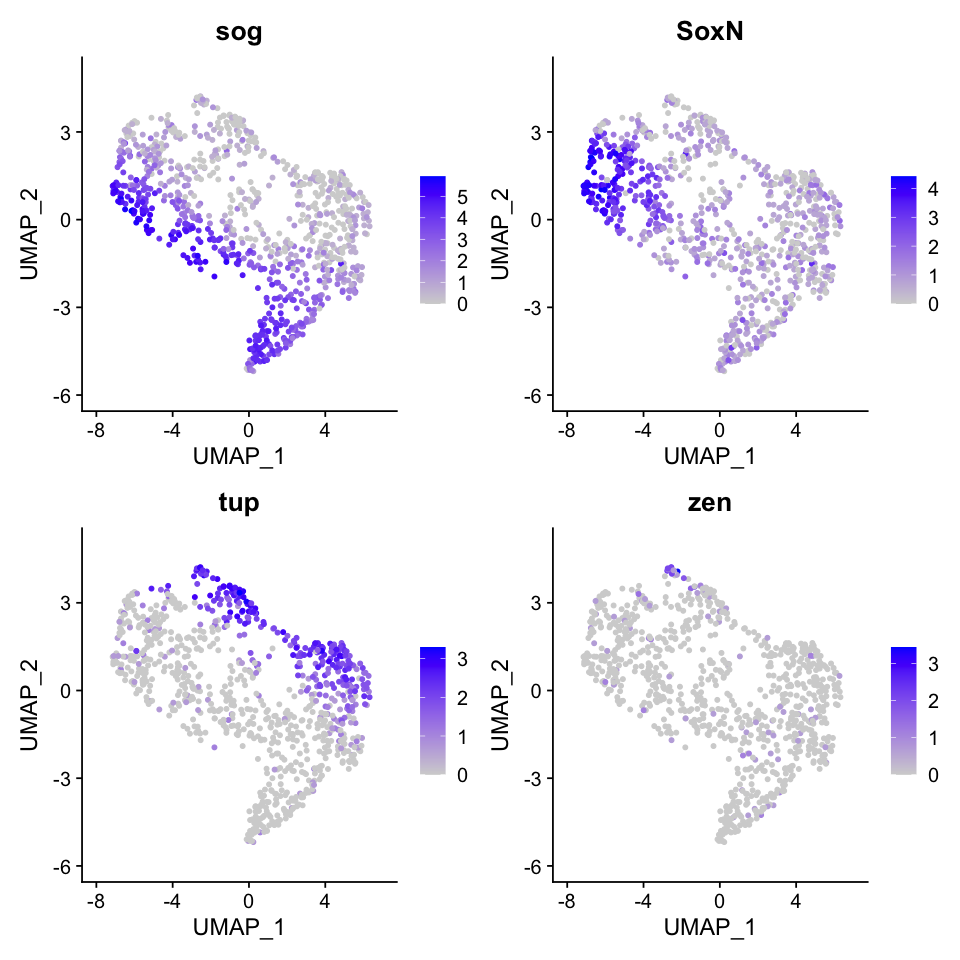

In [36]:
#DV-genes
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_postend, reduction = "umap", features = c("sog", "SoxN", "tup", "zen"), pt.size = 1,  ncol = 2)

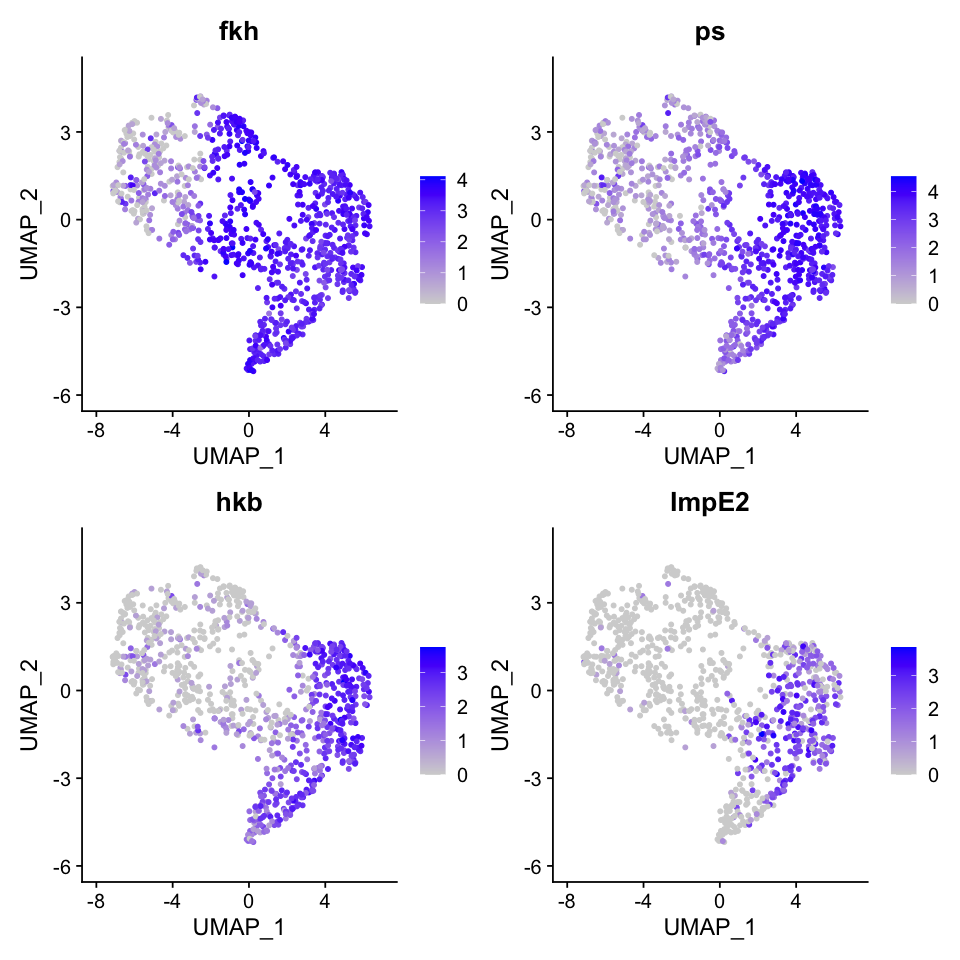

In [37]:
#Midgut markers
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_postend, reduction = "umap", features = c("fkh", "ps", "hkb", "ImpE2"), pt.size = 1,  ncol = 2)

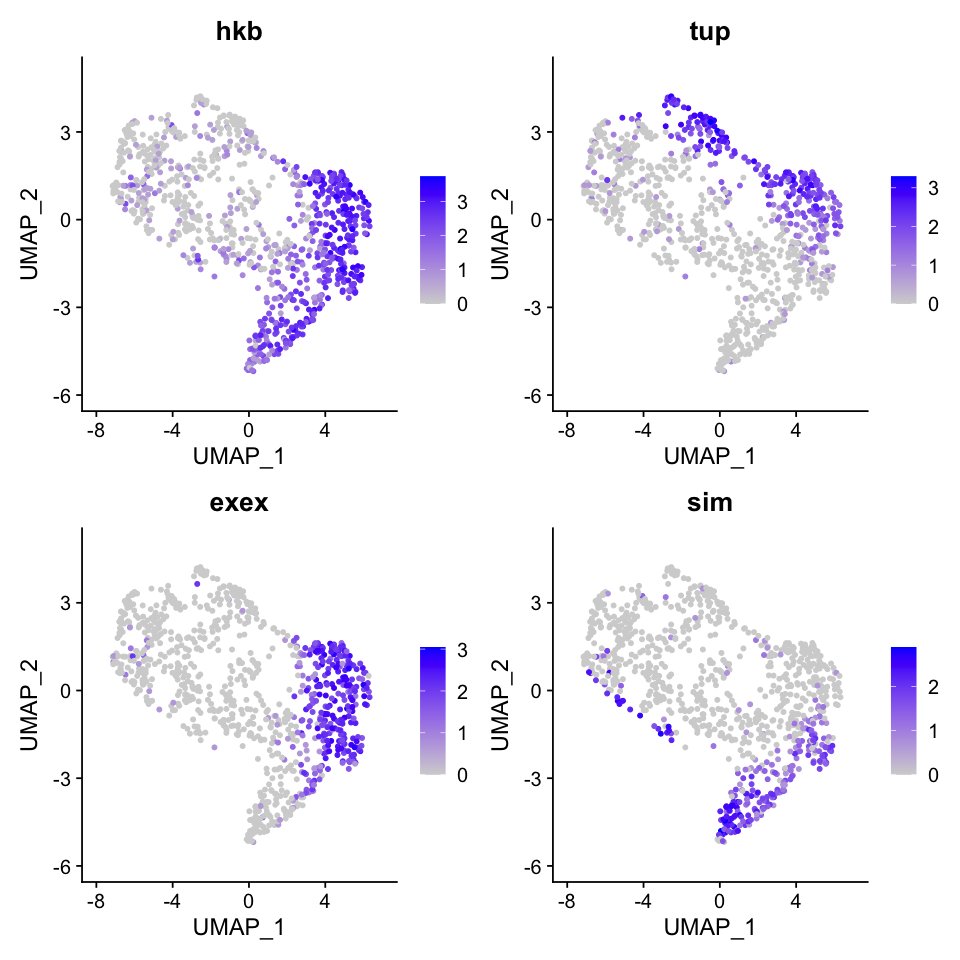

In [38]:
#DV-axis in midgut
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_postend, reduction = "umap", features = c("hkb", "tup", "exex", "sim"), pt.size = 1,  ncol = 2)

## Add annotation

In [39]:
seu_HQC_post_seuID <- seu_HQC_postend$seurat_clusters
test <- as.data.frame(seu_HQC_post_seuID)
head(test)

seu_HQC_post_seuID
AAACCCAAGCGATCGA 4                 
AAACGAAAGGAACGAA 6                 
AAACGAACACTAGTAC 0                 
AAACGCTAGCGAACTG 11                
AAACGCTTCCGTTGAA 3                 
AAAGAACAGACATAGT 5

In [40]:
colnames(test) <- c("ID")
head(test)

ID
AAACCCAAGCGATCGA 4 
AAACGAAAGGAACGAA 6 
AAACGAACACTAGTAC 0 
AAACGCTAGCGAACTG 11
AAACGCTTCCGTTGAA 3 
AAAGAACAGACATAGT 5

In [41]:
manual_ID <- as.data.frame(seu_HQC_postend$seurat_clusters)
colnames(manual_ID) <- c('manual_ID')
head(manual_ID)

manual_ID$manual_ID <- dplyr::recode(manual_ID$manual_ID, 
                                        "0" = "endoderm_postMG_lateral",  #ps+, hkb+
                                        "1" = "endoderm_postMG_dorsal",   # ps+, hkb+, tup+
                                        "2" = "ectoderm_hindgut_dorsal",  #byn+
                                        "3" = "ectoderm_PS14/hindgut", #byn+, Abd-B+
                                        "4" = "endoderm_postMG_ventral",   #ps+, hkb+, sim+
                                        "5" = "ectoderm_PS14_dorsal",   #Abd-B+, sog-
                                        "6" = "ectoderm_hindgut_ventral",   #byn+
                                        "7" = "ectoderm_PS14_ventral",   #Abd-B+, sog+
                                        "8" = "endoderm_postMG_lateral",  #ps+, hkb+, tup+, sim+
                                        "9" = "endoderm_postMG_lateral",   #ps+, hkb+, tup+, sim+
                                        "10" = "endoderm_postMG_ventral",   #ps+, hkb+, sim+
                                        "11" = "ectoderm_PS14_dorsal",   #Abd-B+, sog-
                                        "12" = "ectoderm_hindgut_ventral",   #byn+
                                        "13" = "endoderm_postMG_dorsal",   #ps+, hkb+, tup+
                                        "14" = "endoderm_postMG_dorsal",   #ps+, hkb+, tup+
                                        "15" = "amnioserosa_PS14",   #Abd-B+, zen+
                                     )

manual_ID
AAACCCAAGCGATCGA 4        
AAACGAAAGGAACGAA 6        
AAACGAACACTAGTAC 0        
AAACGCTAGCGAACTG 11       
AAACGCTTCCGTTGAA 3        
AAAGAACAGACATAGT 5

In [42]:
# "0" = "endoderm_postMG_lateral",  #cluster0 #ps+, hkb+
# "1" = "endoderm_postMG_dorsal",   #cluster1 #ps+, hkb+, tup+
# "2" = "ectoderm_hindgut_dorsal",   #cluster2 #byn+
# "3" = "ectoderm_PS14/ectoderm_hindgut",   #cluster3 #byn+, Abd-B+
# "4" = "endoderm_postMG_ventral",   #cluster4 #ps+, hkb+
# "5" = "ectoderm_PS14_dorsal",   #cluster5 Abd-B+
# "6" = "ectoderm_hindgut_ventral",   #cluster6 #byn+
# "7" = "ectoderm_PS14_ventral",   #cluster7 Abd-B+, sog+
# "8" = "endoderm_postMG_lateral",   #cluster8 #ps+, hkb+
# "9" = "endoderm_postMG_lateral",   #cluster9 #ps+, hkb+
# "10" = "endoderm_postMG_ventral",   #cluster10 #ps+, hkb+, sim+
# "11" = "ectoderm_PS14_dorsal",   #cluster11 Abd-B+, sog-
# "12" = "ectoderm_hindgut_ventral",   #cluster12 #byn+
# "13" = "endoderm_postMG_dorsal",   #cluster13 #ps+, hkb+
# "14" = "endoderm_postMG_dorsal",   #cluster14 #ps+, hkb+
# "15" = "amnioserosa_PS14",   #cluster15 Abd-B+, zen+

# head(test)
# dim(test)

In [43]:
# test$ID <- as.factor(test$ID)
# levels(test$ID)

In [44]:
seu_HQC_postend$manual_ID <- manual_ID

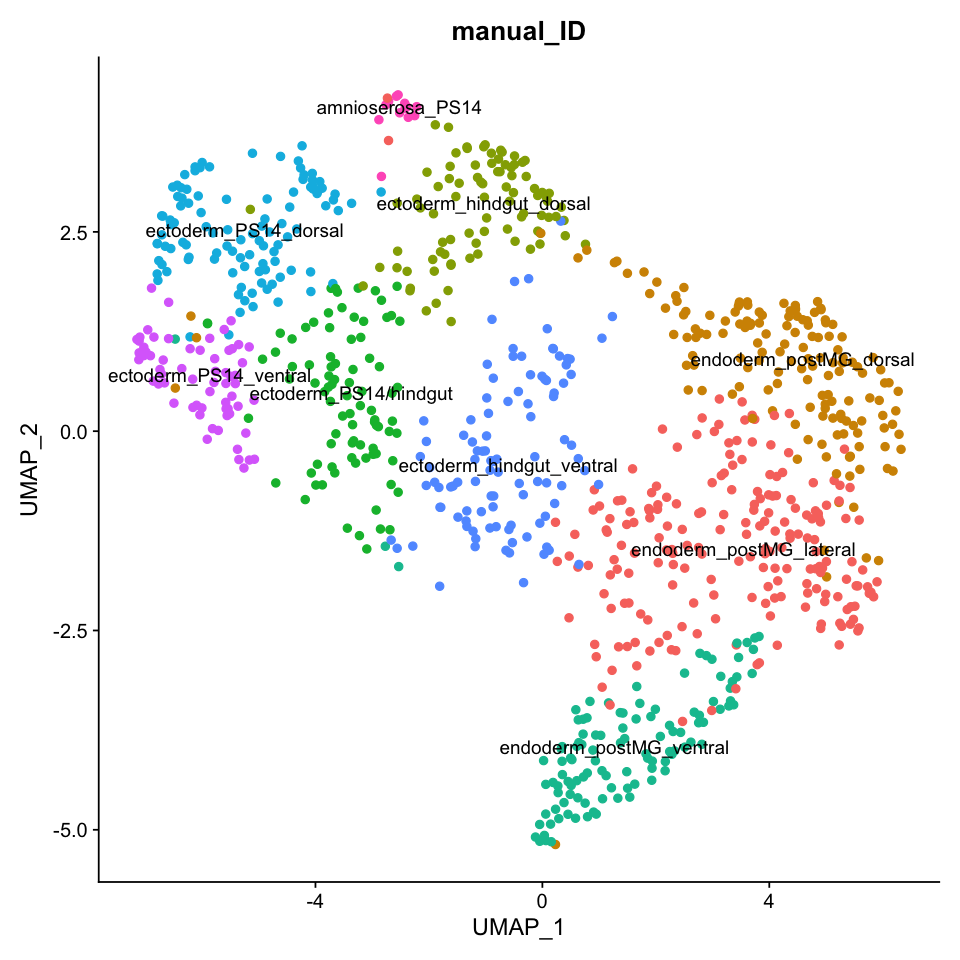

In [45]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC_postend, reduction =  "umap", group.by = "manual_ID", label = TRUE,  pt.size = 2) + NoLegend()

In [46]:
test <- as.data.frame(seu_HQC_postend$manual_ID)
colnames(test) <- 'ID'
head(test)

ID                      
AAACCCAAGCGATCGA endoderm_postMG_ventral 
AAACGAAAGGAACGAA ectoderm_hindgut_ventral
AAACGAACACTAGTAC endoderm_postMG_lateral 
AAACGCTAGCGAACTG ectoderm_PS14_dorsal    
AAACGCTTCCGTTGAA ectoderm_PS14/hindgut   
AAAGAACAGACATAGT ectoderm_PS14_dorsal

In [47]:
write.table(test, file="./manual_ID_list/seu_HQC_postend_manualID.txt",sep="\t",col.names=T,row.names=T,quote=F)

In [48]:
Idents(seu_HQC_postend) <- 'manual_ID'
levels(seu_HQC_postend) <- c('amnioserosa_PS14','ectoderm_PS14_ventral','ectoderm_PS14_dorsal',
                            'ectoderm_PS14/hindgut',
                            'ectoderm_hindgut_dorsal','ectoderm_hindgut_ventral',
                            'endoderm_postMG_dorsal','endoderm_postMG_lateral','endoderm_postMG_ventral')
all.markers.post <- FindAllMarkers(object = seu_HQC_postend, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster amnioserosa_PS14

Calculating cluster ectoderm_PS14_ventral

Calculating cluster ectoderm_PS14_dorsal

Calculating cluster ectoderm_PS14/hindgut

Calculating cluster ectoderm_hindgut_dorsal

Calculating cluster ectoderm_hindgut_ventral

Calculating cluster endoderm_postMG_dorsal

Calculating cluster endoderm_postMG_lateral

Calculating cluster endoderm_postMG_ventral



[1] 1397

[1] 90

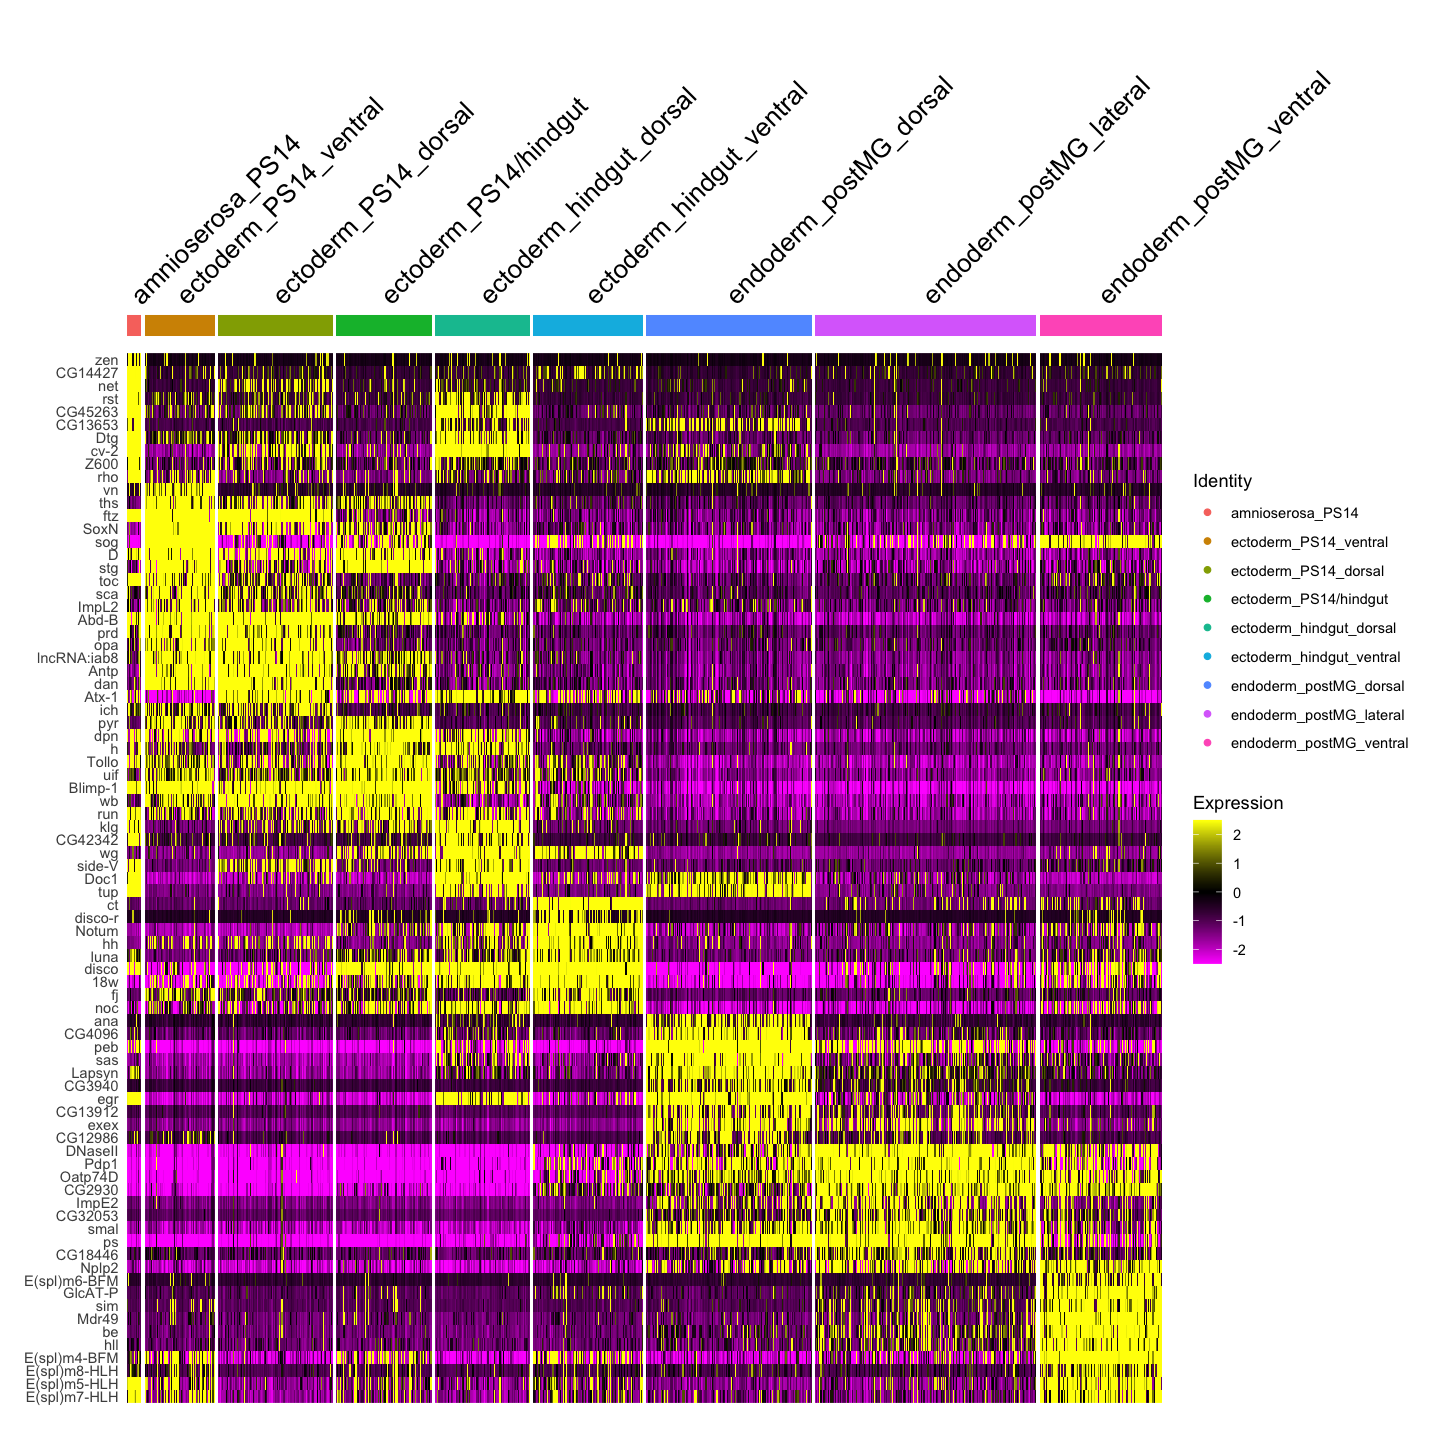

In [49]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu_HQC_postend, features = c(all.markers.post.top10$gene))

In [50]:
all.markers <- FindAllMarkers(seu_HQC_postend, only.pos = T)
dim(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster amnioserosa_PS14

Calculating cluster ectoderm_PS14_ventral

Calculating cluster ectoderm_PS14_dorsal

Calculating cluster ectoderm_PS14/hindgut

Calculating cluster ectoderm_hindgut_dorsal

Calculating cluster ectoderm_hindgut_ventral

Calculating cluster endoderm_postMG_dorsal

Calculating cluster endoderm_postMG_lateral

Calculating cluster endoderm_postMG_ventral



[1] 1397    7

In [51]:
write.table(all.markers, file = './subcluster_markers/markers_post.txt', sep = '\t')

Saving 7 x 7 in image



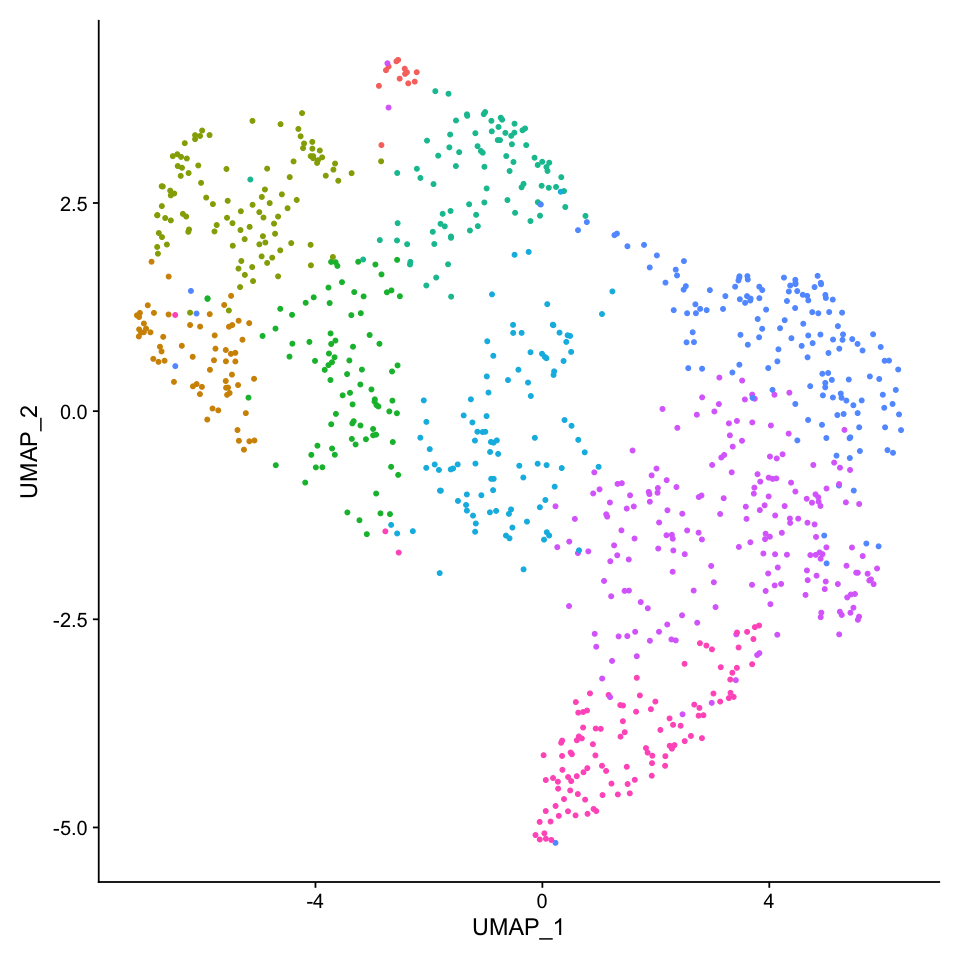

In [52]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC_postend, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/06_subclustering_postend_manualID/post_umap1.eps", dpi = 300)

Saving 7 x 7 in image



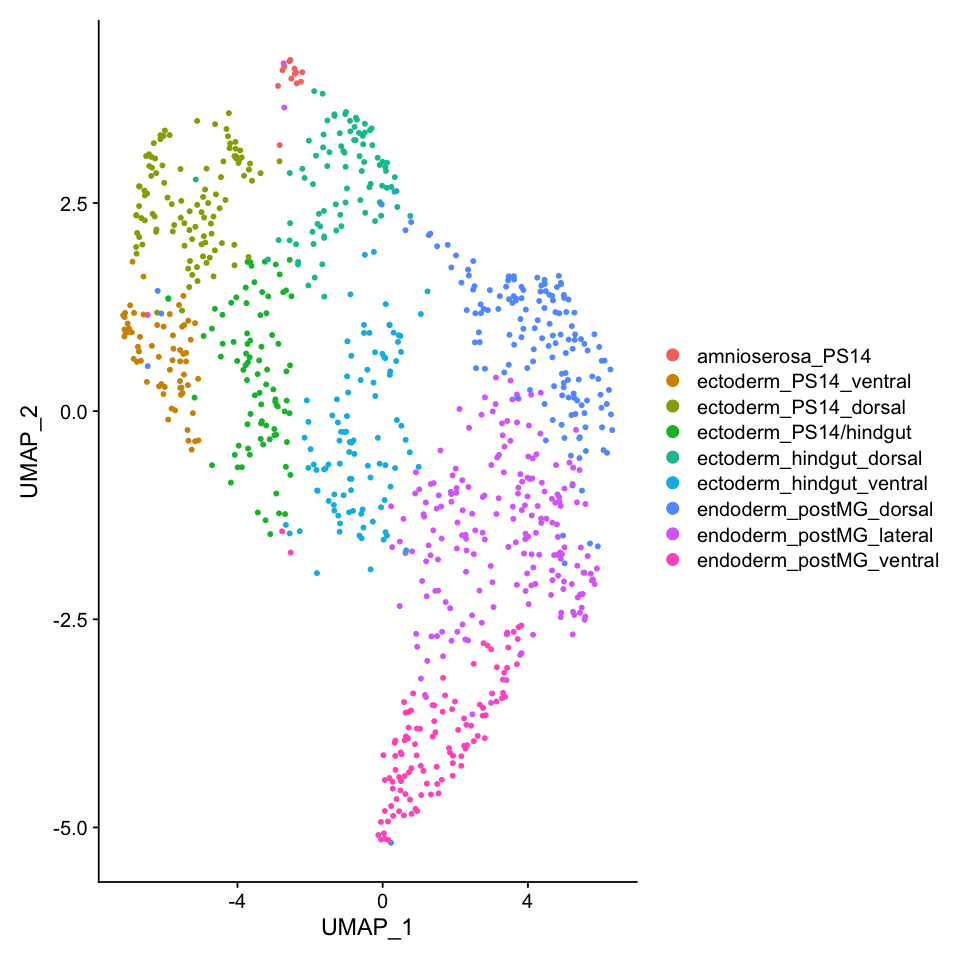

In [53]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC_postend, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/06_subclustering_postend_manualID/post_umap2.eps", dpi = 300)

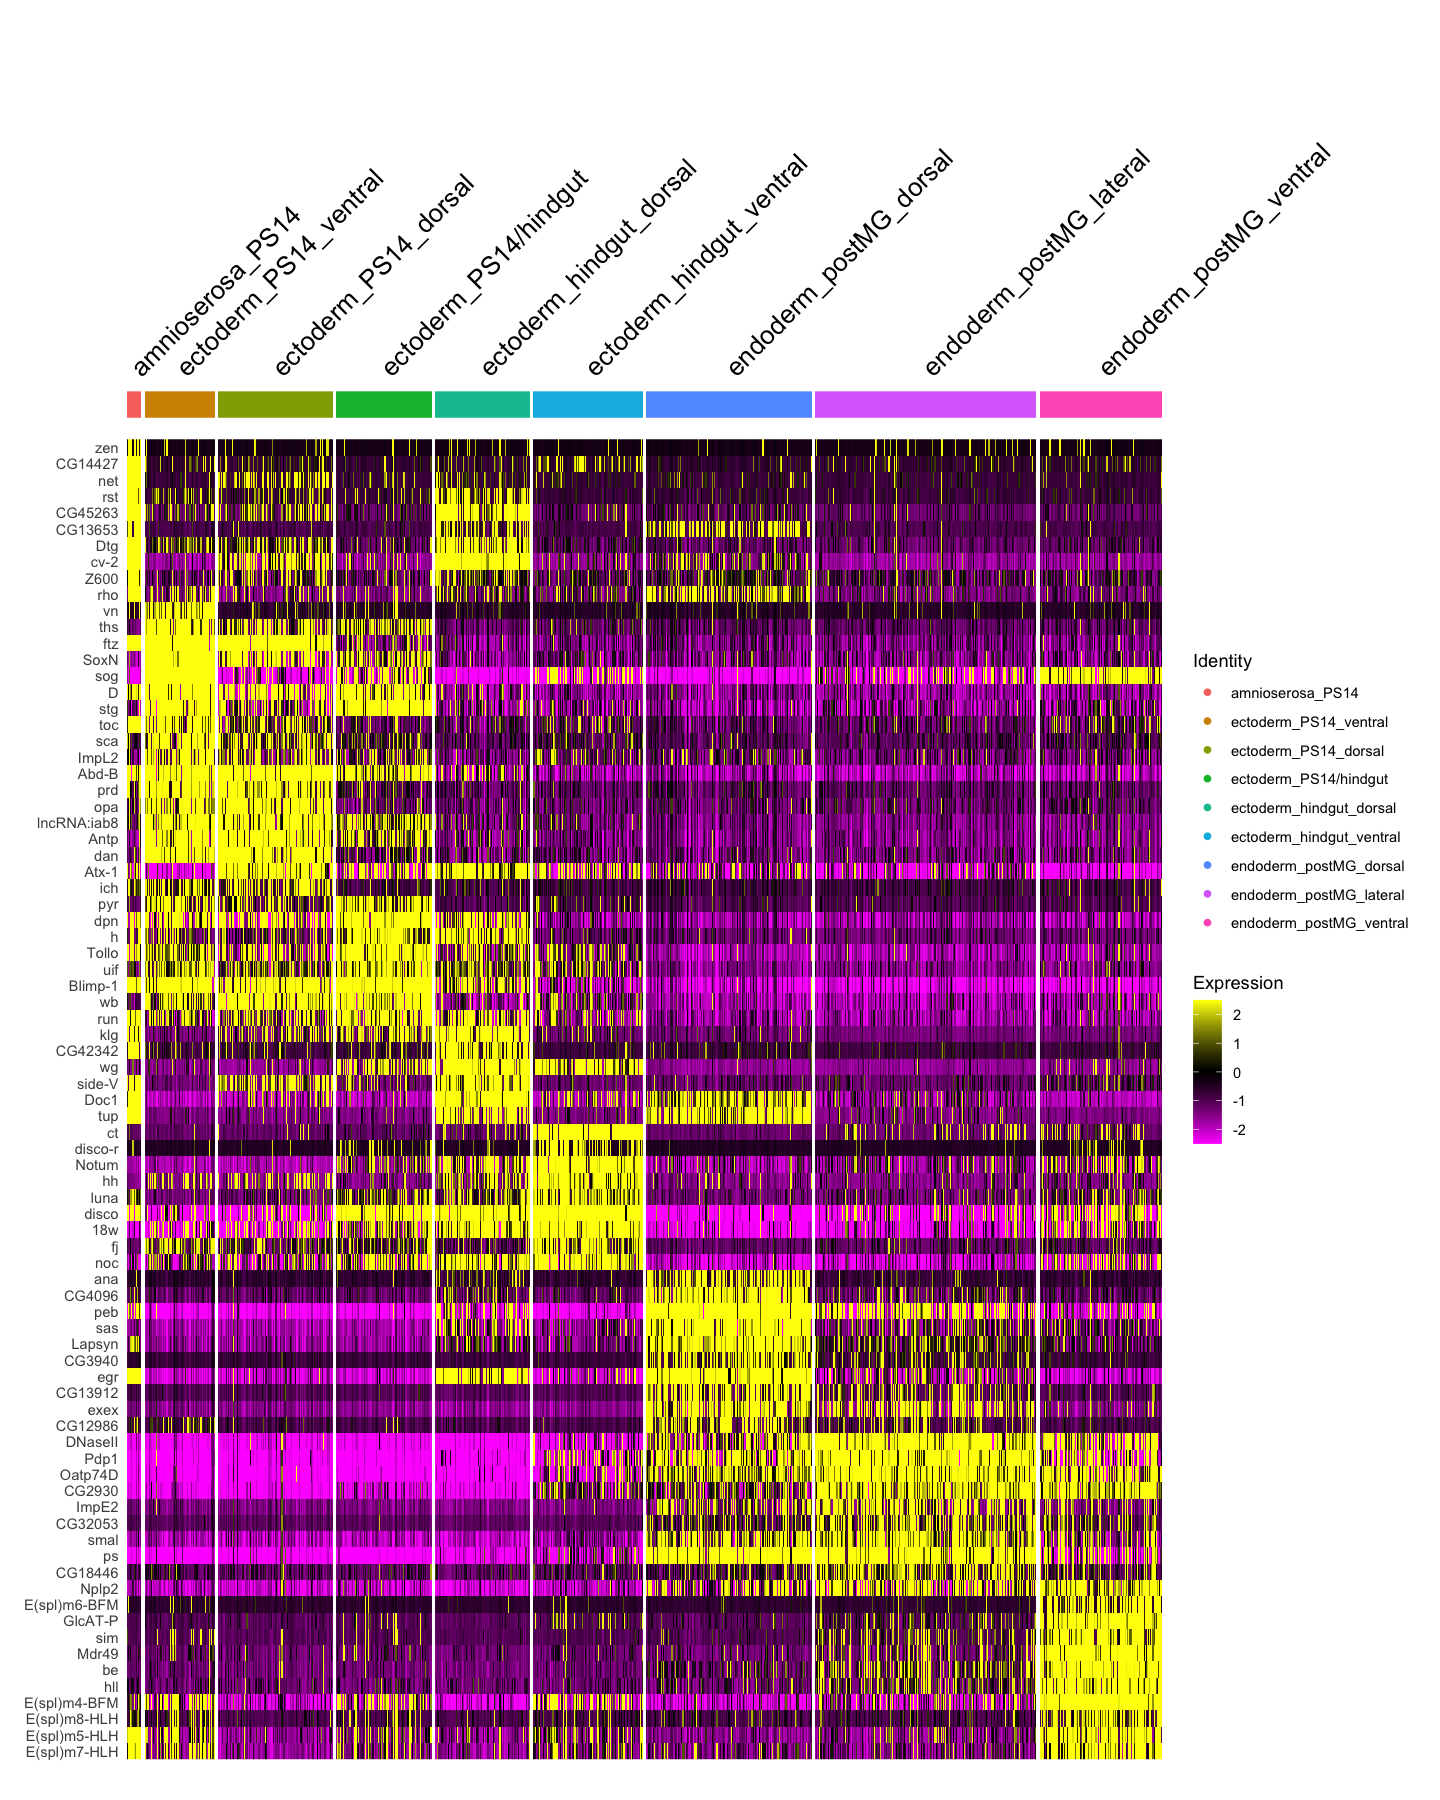

In [54]:
options(repr.plot.width=12, repr.plot.height=15)
fig <- DoHeatmap(seu_HQC_postend,  features = c(all.markers.top10$gene))
fig
ggsave(fig, file = "./figures/06_subclustering_postend_manualID/post_manualID_heatmap_renorm.eps", dpi = 300,  width = 12, height = 8)

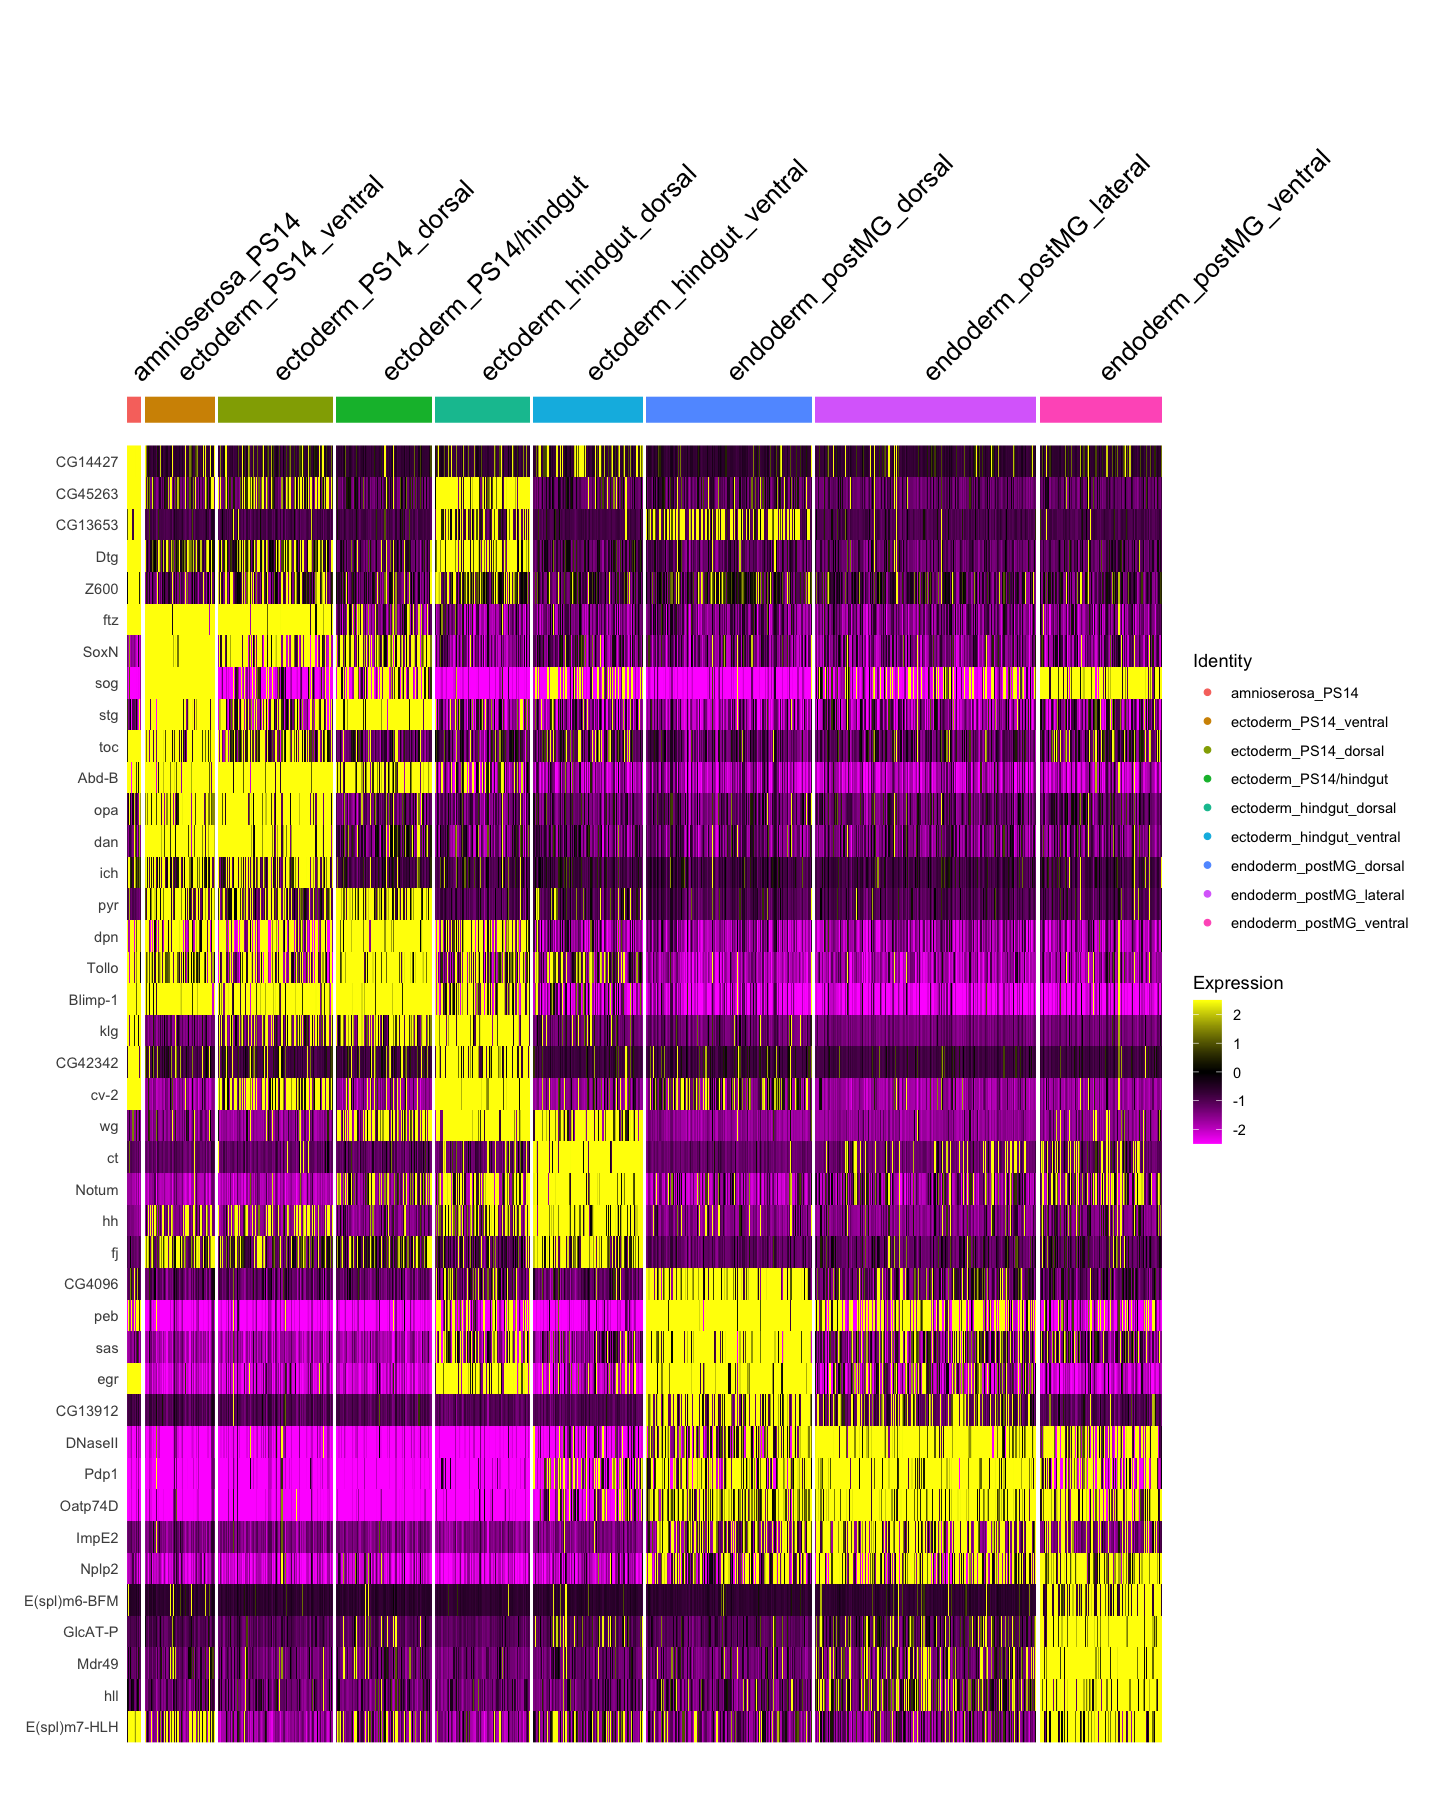

In [55]:
all.markers.top5 <- all.markers %>% group_by(cluster) %>% top_n(n = 5, wt = avg_logFC)
options(repr.plot.width=12, repr.plot.height=15)
fig <- DoHeatmap(seu_HQC_postend,  features = c(all.markers.top5$gene))
fig
ggsave(fig, file = "./figures/06_subclustering_postend_manualID/post_manualID_heatmap_renorm_top5.eps", dpi = 300,  width = 12, height = 8)

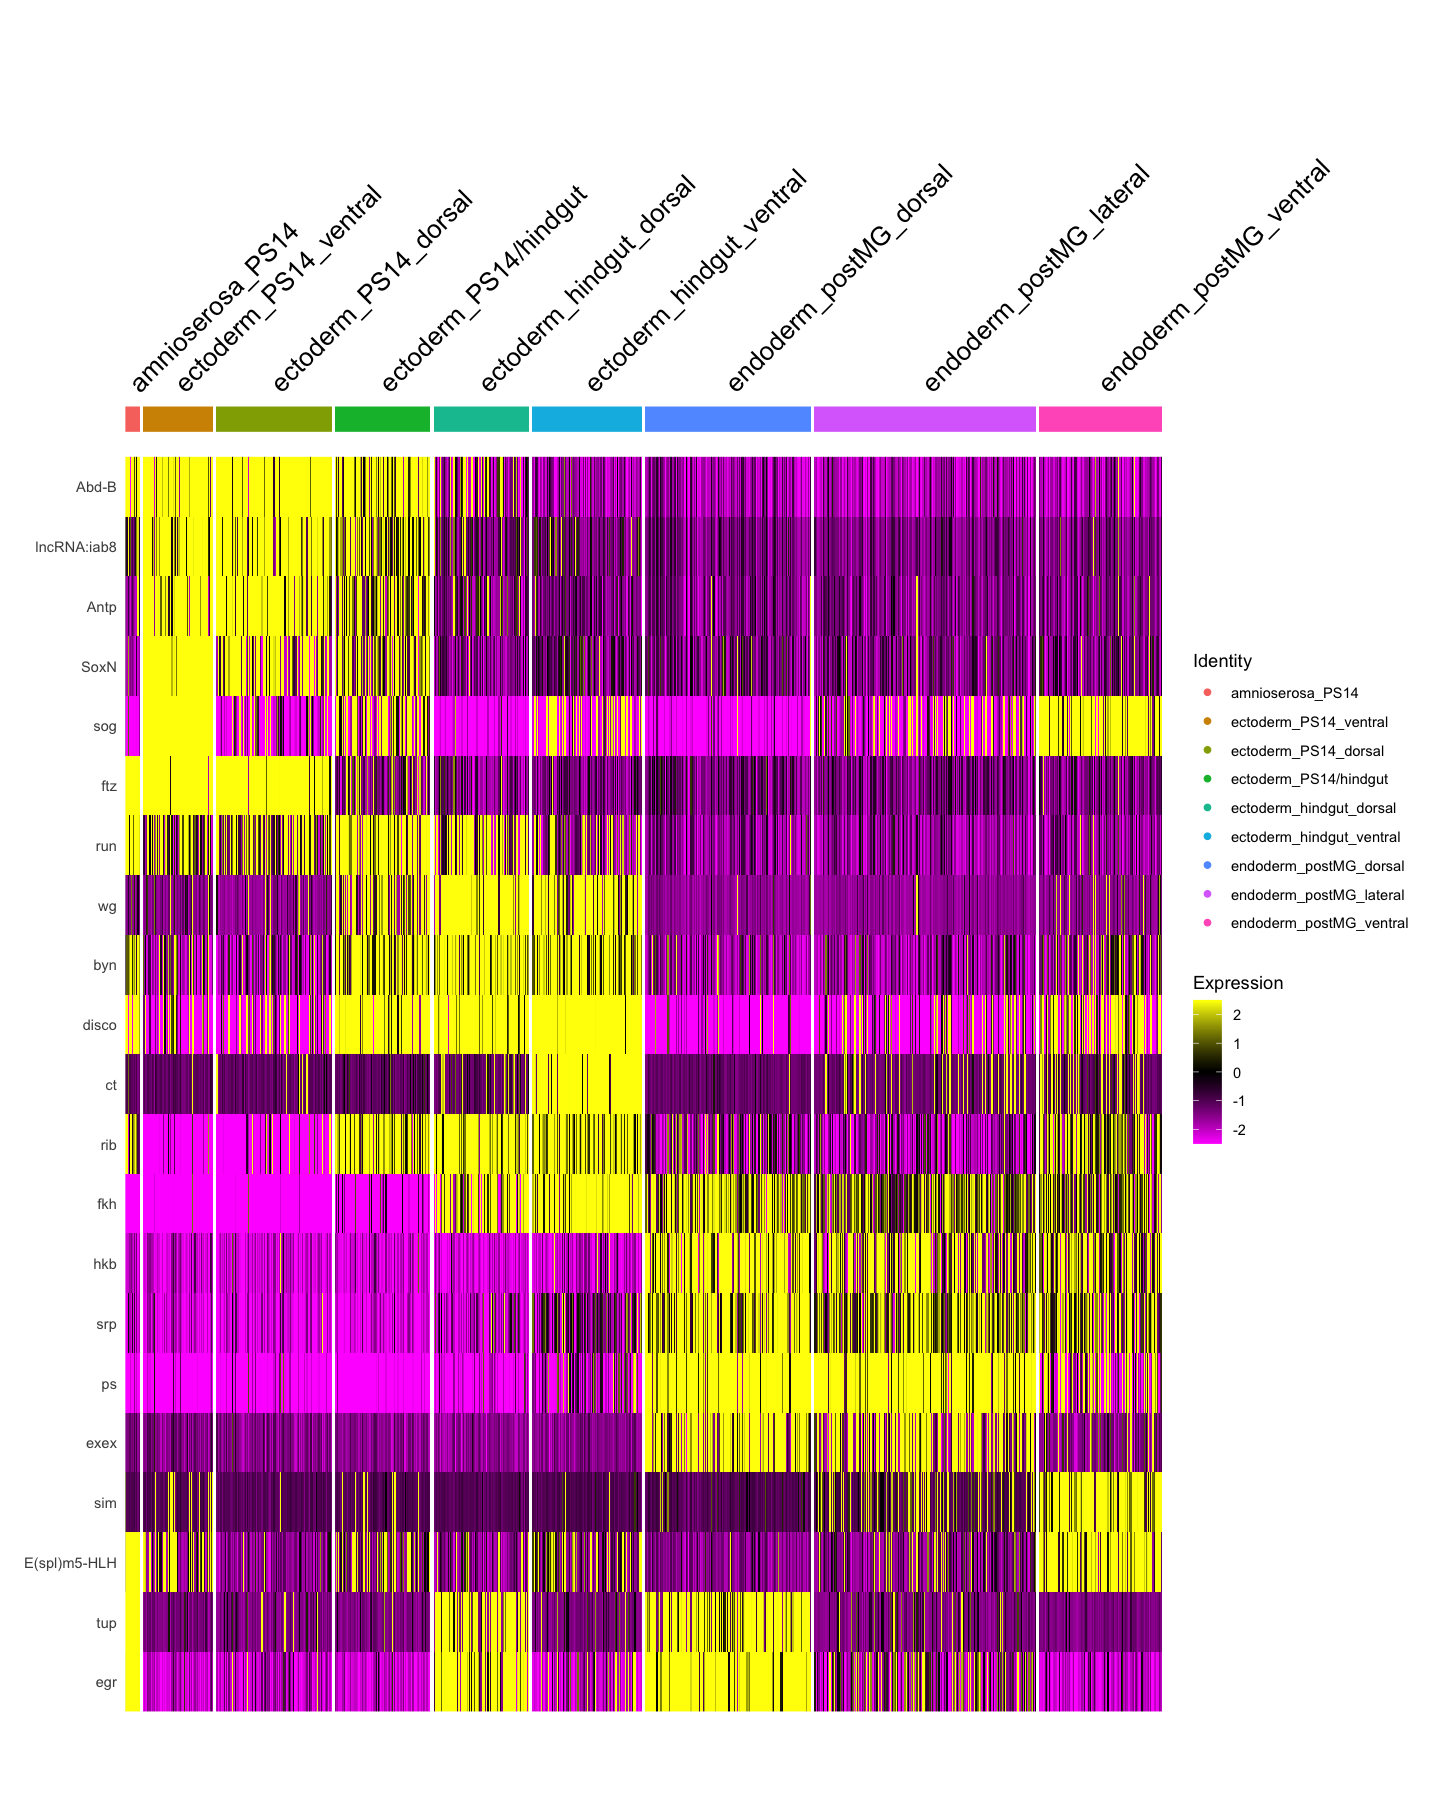

In [56]:
all.markers.top5 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
options(repr.plot.width=12, repr.plot.height=15)
fig <- DoHeatmap(seu_HQC_postend,  features = c('Abd-B','lncRNA:iab8','Antp','SoxN','sog','ftz',
                                                'run','wg','byn','disco','ct',
                                                'rib','fkh','hkb','srp','ps',
                                                'exex','sim','E(spl)m5-HLH','tup','egr'))
fig
ggsave(fig, file = "./figures/06_subclustering_postend_manualID/post_manualID_heatmap_renorm_selected.eps", dpi = 300,  width = 12, height = 12)

In [57]:
saveRDS(seu_HQC_postend, file = '../../data/seurat_object/Set3/subclustering/seu_post_end_subclustered.obj')

In [58]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv